# Kaggle Used Cars Rate Prediction

## Importing all necessory libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import pickle
import warnings
warnings.filterwarnings('ignore')
import plotly.io as pio
pio.renderers.default='notebook'

In [2]:
# Reading the dataframe

df = pd.read_csv("Data/Cars/Train.csv")
df.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   New_Price  Price  
0        NaN   1.75  
1        NaN  12.50  
2  8.61 Lakh   4.50  
3        NaN   6.00  
4        NaN  17.74

In [3]:
# Getting info of columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [4]:
# Finding percentage of missing columns values

round(df.isna().sum() / len(df) * 100 , 2).sort_values(ascending = False)

New_Price            86.31
Seats                 0.70
Engine                0.60
Power                 0.60
Mileage               0.03
Name                  0.00
Location              0.00
Year                  0.00
Kilometers_Driven     0.00
Fuel_Type             0.00
Transmission          0.00
Owner_Type            0.00
Price                 0.00
dtype: float64

In [5]:
# Describe function to get insights of numerical columns

df.describe()

Year  Kilometers_Driven        Seats        Price
count  6019.000000       6.019000e+03  5977.000000  6019.000000
mean   2013.358199       5.873838e+04     5.278735     9.479468
std       3.269742       9.126884e+04     0.808840    11.187917
min    1998.000000       1.710000e+02     0.000000     0.440000
25%    2011.000000       3.400000e+04     5.000000     3.500000
50%    2014.000000       5.300000e+04     5.000000     5.640000
75%    2016.000000       7.300000e+04     5.000000     9.950000
max    2019.000000       6.500000e+06    10.000000   160.000000

In [6]:
# Dropping New_Price columns as it has more percentage of missing values 

df.drop(["New_Price"] , axis = 1 , inplace = True)

In [7]:
tt = pd.read_csv("Data/Cars/Test.csv")
tt.head()

Name    Location  Year  \
0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3                       Toyota Etios Liva GD   Hyderabad  2012   
4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type      Mileage   Engine  \
0              40929       CNG       Manual      First  32.26 km/kg   998 CC   
1              54493    Petrol       Manual     Second    24.7 kmpl   796 CC   
2              34000    Diesel       Manual      First   13.68 kmpl  2393 CC   
3             139000    Diesel       Manual      First   23.59 kmpl  1364 CC   
4              29000    Petrol       Manual      First    18.5 kmpl  1197 CC   

       Power  Seats   New_Price  
0   58.2 bhp    4.0         NaN  
1   47.3 bhp    5.0         NaN  
2  147.8 bhp    7.0  25.27 Lakh  
3   null bhp    5.0         NaN  
4  82.85 bhp    5.0         NaN

In [8]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Mileage            1234 non-null   object 
 8   Engine             1224 non-null   object 
 9   Power              1224 non-null   object 
 10  Seats              1223 non-null   float64
 11  New_Price          182 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 115.8+ KB


In [9]:
round(tt.isna().sum() / len(tt) * 100 , 2).sort_values(ascending = False)

New_Price            85.25
Seats                 0.89
Engine                0.81
Power                 0.81
Name                  0.00
Location              0.00
Year                  0.00
Kilometers_Driven     0.00
Fuel_Type             0.00
Transmission          0.00
Owner_Type            0.00
Mileage               0.00
dtype: float64

In [10]:
tt.drop(["New_Price"] , axis = 1 , inplace = True)

## EDA Tools

In [11]:
# Getting unique , value_counts of columns

for i in df.columns:
    print(f"The number of unique values in {i} column is/are : {len(df[i].unique())}")
    print("\n")
    print(f"The unique values in {i} column is/are : {df[i].unique()}")
    print("\n")
    print(f"The value counts for each value in {i} column is/are :  \n{df[i].value_counts()}")
    print("\n\n")
    print("*"*100)
    print("\n\n")

The number of unique values in Name column is/are : 1876


The unique values in Name column is/are : ['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Volkswagen Polo IPL II 1.2 Petrol Highline'
 'Tata Bolt Revotron XT' 'Mahindra Xylo D4 BSIV']


The value counts for each value in Name column is/are :  
Mahindra XUV500 W8 2WD                  49
Maruti Swift VDI                        45
Honda City 1.5 S MT                     34
Maruti Swift Dzire VDI                  34
Maruti Swift VDI BSIV                   31
                                        ..
Volkswagen Polo 1.0 MPI Comfortline      1
Volvo XC90 2007-2015 D5 AWD              1
Hyundai Verna CRDi 1.4 E                 1
Mercedes-Benz E-Class 230                1
Mahindra Scorpio 2009-2014 LX 2WD 7S     1
Name: Name, Length: 1876, dtype: int64



****************************************************************************************************



The number of unique values in Location colu

Since "Mileage" columns has two different units...we nned to fix it

In [12]:
df.loc[df["Mileage"].str.lower().str.split().str.get(1) == "km/kg"]

Name   Location  Year  \
0                     Maruti Wagon R LXI CNG     Mumbai  2010   
5            Hyundai EON LPG Era Plus Option  Hyderabad  2012   
127                   Maruti Wagon R LXI CNG       Pune  2013   
328        Maruti Zen Estilo LXI Green (CNG)       Pune  2008   
440   Maruti Eeco 5 STR With AC Plus HTR CNG      Kochi  2017   
...                                      ...        ...   ...   
5876                   Maruti Ertiga VXI CNG     Mumbai  2017   
5881                  Maruti Wagon R LXI CNG       Pune  2015   
5902                  Maruti Wagon R LXI CNG     Mumbai  2012   
5935                 Maruti Alto K10 LXI CNG       Pune  2015   
5997                  Maruti Wagon R Duo Lxi     Jaipur  2010   

      Kilometers_Driven Fuel_Type Transmission Owner_Type      Mileage  \
0                 72000       CNG       Manual      First   26.6 km/kg   
5                 75000       LPG       Manual      First   21.1 km/kg   
127               89900       CNG       Manual      First   26.6 km/kg   
328               42496       CNG       Manual      First   26.3 km/kg   
440               31841       CNG       Manual      First   15.1 km/kg   
...                 ...       ...          ...        ...          ...   
5876              23700       CNG       Manual      First   17.5 km/kg   
5881              55000       CNG       Manual      First   26.6 km/kg   
5902              72000       CNG       Manual      First   26.2 km/kg   
5935              59525       CNG       Manual     Second  32.26 km/kg   
5997              70000       LPG       Manual      First   26.2 km/kg   

       Engine      Power  Seats  Price  
0      998 CC  58.16 bhp    5.0   1.75  
5      814 CC   55.2 bhp    5.0   2.35  
127    998 CC  58.16 bhp    5.0   3.25  
328    998 CC   67.1 bhp    5.0   1.40  
440   1196 CC     73 bhp    5.0   4.70  
...       ...        ...    ...    ...  
5876  1373 CC  80.46 bhp    7.0   8.25  
5881   998 CC  58.16 bhp    5.0   3.70  
5902   998 CC   58.2 bhp    5.0   2.25  
5935   998 CC   58.2 bhp    4.0   3.10  
5997   998 CC   58.2 bhp    5.0   2.27  

[66 rows x 12 columns]

### Splitting Columns into values and units

In [13]:
# for i in ["Mileage" , "Engine" , "Power"]:
#     df[i] = df[i].apply(lambda x : x.split()[0] if (np.all(pd.notnull(x))) else x)    
#     df[i] = pd.to_numeric(df[i] , errors = "coerce")    

In [14]:
for i in ["Mileage" , "Engine" , "Power"]:
    df["{}_num".format(i)] = df[i].str.lower().str.split().str[0]
    df["{}_units".format(i)] = df[i].str.lower().str.split().str[1]
    df["{}_num".format(i)] = pd.to_numeric(df["{}_num".format(i)] , errors = "coerce")
    df.drop([i] , axis = 1 , inplace = True)

In [15]:
df.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Seats  Price  Mileage_num Mileage_units  \
0       CNG       Manual      First    5.0   1.75        26.60         km/kg   
1    Diesel       Manual      First    5.0  12.50        19.67          kmpl   
2    Petrol       Manual      First    5.0   4.50        18.20          kmpl   
3    Diesel       Manual      First    7.0   6.00        20.77          kmpl   
4    Diesel    Automatic     Second    5.0  17.74        15.20          kmpl   

   Engine_num Engine_units  Power_num Power_units  
0       998.0           cc      58.16         bhp  
1      1582.0           cc     126.20         bhp  
2      1199.0           cc      88.70         bhp  
3      1248.0           cc      88.76         bhp  
4      1968.0           cc     140.80         bhp

In [16]:
df["Mileage_units"].value_counts()

kmpl     5951
km/kg      66
Name: Mileage_units, dtype: int64

In [17]:
df["Engine_units"].value_counts()

cc    5983
Name: Engine_units, dtype: int64

In [18]:
df["Power_units"].value_counts()

bhp    5983
Name: Power_units, dtype: int64

Converting km/kg into kmpl of mileage column

In [19]:
df.loc[df["Mileage_units"] == "km/kg" , ["Mileage_num"]] = df["Mileage_num"]*1.40

In [20]:
df.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Seats  Price  Mileage_num Mileage_units  \
0       CNG       Manual      First    5.0   1.75        37.24         km/kg   
1    Diesel       Manual      First    5.0  12.50        19.67          kmpl   
2    Petrol       Manual      First    5.0   4.50        18.20          kmpl   
3    Diesel       Manual      First    7.0   6.00        20.77          kmpl   
4    Diesel    Automatic     Second    5.0  17.74        15.20          kmpl   

   Engine_num Engine_units  Power_num Power_units  
0       998.0           cc      58.16         bhp  
1      1582.0           cc     126.20         bhp  
2      1199.0           cc      88.70         bhp  
3      1248.0           cc      88.76         bhp  
4      1968.0           cc     140.80         bhp

In [21]:
# for i in ["Mileage" , "Engine" , "Power"]:
#     tt[i] = tt[i].apply(lambda x : x.split()[0] if (np.all(pd.notnull(x))) else x)    
#     tt[i] = pd.to_numeric(tt[i] , errors = "coerce") 

In [22]:
for i in ["Mileage" , "Engine" , "Power"]:
    tt["{}_num".format(i)] = tt[i].str.lower().str.split().str[0]
    tt["{}_units".format(i)] = tt[i].str.lower().str.split().str[1]
    tt["{}_num".format(i)] = pd.to_numeric(tt["{}_num".format(i)] , errors = "coerce")
    tt.drop([i] , axis = 1 , inplace = True)

In [23]:
tt.head()

Name    Location  Year  \
0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3                       Toyota Etios Liva GD   Hyderabad  2012   
4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Seats  Mileage_num  \
0              40929       CNG       Manual      First    4.0        32.26   
1              54493    Petrol       Manual     Second    5.0        24.70   
2              34000    Diesel       Manual      First    7.0        13.68   
3             139000    Diesel       Manual      First    5.0        23.59   
4              29000    Petrol       Manual      First    5.0        18.50   

  Mileage_units  Engine_num Engine_units  Power_num Power_units  
0         km/kg       998.0           cc      58.20         bhp  
1          kmpl       796.0           cc      47.30         bhp  
2          kmpl      2393.0           cc     147.80         bhp  
3          kmpl      1364.0           cc        NaN         bhp  
4          kmpl      1197.0           cc      82.85         bhp

In [24]:
tt.loc[tt["Mileage_units"] == "km/kg" , ["Mileage_num"]] = tt["Mileage_num"]*1.40

In [25]:
tt.head()

Name    Location  Year  \
0                    Maruti Alto K10 LXI CNG       Delhi  2014   
1              Maruti Alto 800 2016-2019 LXI  Coimbatore  2013   
2  Toyota Innova Crysta Touring Sport 2.4 MT      Mumbai  2017   
3                       Toyota Etios Liva GD   Hyderabad  2012   
4                          Hyundai i20 Magna      Mumbai  2014   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Seats  Mileage_num  \
0              40929       CNG       Manual      First    4.0       45.164   
1              54493    Petrol       Manual     Second    5.0       24.700   
2              34000    Diesel       Manual      First    7.0       13.680   
3             139000    Diesel       Manual      First    5.0       23.590   
4              29000    Petrol       Manual      First    5.0       18.500   

  Mileage_units  Engine_num Engine_units  Power_num Power_units  
0         km/kg       998.0           cc      58.20         bhp  
1          kmpl       796.0           cc      47.30         bhp  
2          kmpl      2393.0           cc     147.80         bhp  
3          kmpl      1364.0           cc        NaN         bhp  
4          kmpl      1197.0           cc      82.85         bhp

Dropping units values as they all are same 

In [26]:
df.drop(["Mileage_units" , "Engine_units" , "Power_units"] , axis = 1 , inplace = True)
tt.drop(["Mileage_units" , "Engine_units" , "Power_units"] , axis = 1 , inplace = True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Seats              5977 non-null   float64
 8   Price              6019 non-null   float64
 9   Mileage_num        6017 non-null   float64
 10  Engine_num         5983 non-null   float64
 11  Power_num          5876 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 564.4+ KB


In [28]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Seats              1223 non-null   float64
 8   Mileage_num        1234 non-null   float64
 9   Engine_num         1224 non-null   float64
 10  Power_num          1202 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 106.2+ KB


<AxesSubplot:>

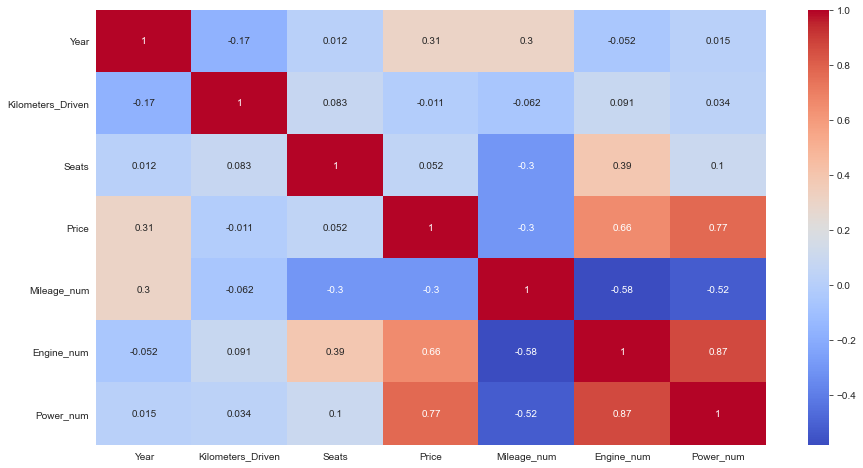

In [29]:
# Seaborn heatmap of correlations in train dataset

plt.figure(figsize = (15 , 8))
sns.heatmap(df.corr() , annot = True , cmap = "coolwarm")

## Perprocessing

### Imputation of missing values in numerical columns with median

In [30]:
for i in ["Mileage_num" , "Engine_num" , "Power_num"]:
    df[i].fillna(df[i].median() , inplace = True)

In [31]:
for i in ["Mileage_num" , "Engine_num" , "Power_num"]:
    tt[i].fillna(df[i].median() , inplace = True)

In [32]:
df["Seats"].median()

5.0

In [33]:
df["Seats"].fillna(df["Seats"].median() , inplace = True)

In [34]:
tt["Seats"].fillna(df["Seats"].median() , inplace = True)

Preprocessing years column

In [35]:
df["Year"] = df["Year"].apply(lambda x : 2021 - x)

In [36]:
tt["Year"] = tt["Year"].apply(lambda x : 2021 - x)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Seats              6019 non-null   float64
 8   Price              6019 non-null   float64
 9   Mileage_num        6019 non-null   float64
 10  Engine_num         6019 non-null   float64
 11  Power_num          6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 564.4+ KB


In [38]:
round(df.isna().sum() / len(df) * 100 , 2).sort_values(ascending = False)

Name                 0.0
Location             0.0
Year                 0.0
Kilometers_Driven    0.0
Fuel_Type            0.0
Transmission         0.0
Owner_Type           0.0
Seats                0.0
Price                0.0
Mileage_num          0.0
Engine_num           0.0
Power_num            0.0
dtype: float64

In [39]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1234 non-null   object 
 1   Location           1234 non-null   object 
 2   Year               1234 non-null   int64  
 3   Kilometers_Driven  1234 non-null   int64  
 4   Fuel_Type          1234 non-null   object 
 5   Transmission       1234 non-null   object 
 6   Owner_Type         1234 non-null   object 
 7   Seats              1234 non-null   float64
 8   Mileage_num        1234 non-null   float64
 9   Engine_num         1234 non-null   float64
 10  Power_num          1234 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 106.2+ KB


In [40]:
round(tt.isna().sum() / len(tt) * 100 , 2).sort_values(ascending = False)

Name                 0.0
Location             0.0
Year                 0.0
Kilometers_Driven    0.0
Fuel_Type            0.0
Transmission         0.0
Owner_Type           0.0
Seats                0.0
Mileage_num          0.0
Engine_num           0.0
Power_num            0.0
dtype: float64

In [41]:
df.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai    11              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune     6              41000   
2                      Honda Jazz V     Chennai    10              46000   
3                 Maruti Ertiga VDI     Chennai     9              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore     8              40670   

  Fuel_Type Transmission Owner_Type  Seats  Price  Mileage_num  Engine_num  \
0       CNG       Manual      First    5.0   1.75        37.24       998.0   
1    Diesel       Manual      First    5.0  12.50        19.67      1582.0   
2    Petrol       Manual      First    5.0   4.50        18.20      1199.0   
3    Diesel       Manual      First    7.0   6.00        20.77      1248.0   
4    Diesel    Automatic     Second    5.0  17.74        15.20      1968.0   

   Power_num  
0      58.16  
1     126.20  
2      88.70  
3      88.76  
4     140.80

### Splitting Name colum into Model and company names

In [42]:
df["Name"]

0                 Maruti Wagon R LXI CNG
1       Hyundai Creta 1.6 CRDi SX Option
2                           Honda Jazz V
3                      Maruti Ertiga VDI
4        Audi A4 New 2.0 TDI Multitronic
                      ...               
6014                    Maruti Swift VDI
6015            Hyundai Xcent 1.1 CRDi S
6016               Mahindra Xylo D4 BSIV
6017                  Maruti Wagon R VXI
6018               Chevrolet Beat Diesel
Name: Name, Length: 6019, dtype: object

In [43]:
# df["Company"] = df["Name"].apply(lambda x : x.split()[0])

df["Company"] = df["Name"].str.split().str[0]

In [44]:
df["Company"]

0          Maruti
1         Hyundai
2           Honda
3          Maruti
4            Audi
          ...    
6014       Maruti
6015      Hyundai
6016     Mahindra
6017       Maruti
6018    Chevrolet
Name: Company, Length: 6019, dtype: object

In [45]:
# df["Model"] = df["Name"].apply(lambda x : x.split()[1])

df["Model"] = df["Name"].str.split().str[1]

In [46]:
df["Model"]

0        Wagon
1        Creta
2         Jazz
3       Ertiga
4           A4
         ...  
6014     Swift
6015     Xcent
6016      Xylo
6017     Wagon
6018      Beat
Name: Model, Length: 6019, dtype: object

In [47]:
df.drop(["Name"] , axis = 1 , inplace = True)

In [48]:
df = df.rename(columns = {"Mileage_num" : "Mileage" , "Engine_num" : "Engine" , "Power_num" : "Power" , "Kilometers_Driven" : "KM" , "Fuel_Type" : "Fuel"})

In [49]:
df.head()

Location  Year     KM    Fuel Transmission Owner_Type  Seats  Price  \
0      Mumbai    11  72000     CNG       Manual      First    5.0   1.75   
1        Pune     6  41000  Diesel       Manual      First    5.0  12.50   
2     Chennai    10  46000  Petrol       Manual      First    5.0   4.50   
3     Chennai     9  87000  Diesel       Manual      First    7.0   6.00   
4  Coimbatore     8  40670  Diesel    Automatic     Second    5.0  17.74   

   Mileage  Engine   Power  Company   Model  
0    37.24   998.0   58.16   Maruti   Wagon  
1    19.67  1582.0  126.20  Hyundai   Creta  
2    18.20  1199.0   88.70    Honda    Jazz  
3    20.77  1248.0   88.76   Maruti  Ertiga  
4    15.20  1968.0  140.80     Audi      A4

In [50]:
# tt["Company"] = tt["Name"].apply(lambda x : x.split()[0])

tt["Company"] = tt["Name"].str.split().str[0]

In [51]:
tt["Company"]

0              Maruti
1              Maruti
2              Toyota
3              Toyota
4             Hyundai
            ...      
1229       Volkswagen
1230       Volkswagen
1231           Nissan
1232       Volkswagen
1233    Mercedes-Benz
Name: Company, Length: 1234, dtype: object

In [52]:
# tt["Model"] = tt["Name"].apply(lambda x : x.split()[1])

tt["Model"] = tt["Name"].str.split().str[1]

In [53]:
tt["Model"]

0          Alto
1          Alto
2        Innova
3         Etios
4           i20
         ...   
1229      Vento
1230       Polo
1231      Micra
1232       Polo
1233    E-Class
Name: Model, Length: 1234, dtype: object

In [54]:
tt.drop(["Name"] , axis = 1 , inplace = True)

In [55]:
tt = tt.rename(columns = {"Mileage_num" : "Mileage" , "Engine_num" : "Engine" , "Power_num" : "Power" , "Kilometers_Driven" : "KM" , "Fuel_Type" : "Fuel"})

In [56]:
tt.head()

Location  Year      KM    Fuel Transmission Owner_Type  Seats  Mileage  \
0       Delhi     7   40929     CNG       Manual      First    4.0   45.164   
1  Coimbatore     8   54493  Petrol       Manual     Second    5.0   24.700   
2      Mumbai     4   34000  Diesel       Manual      First    7.0   13.680   
3   Hyderabad     9  139000  Diesel       Manual      First    5.0   23.590   
4      Mumbai     7   29000  Petrol       Manual      First    5.0   18.500   

   Engine   Power  Company   Model  
0   998.0   58.20   Maruti    Alto  
1   796.0   47.30   Maruti    Alto  
2  2393.0  147.80   Toyota  Innova  
3  1364.0   97.70   Toyota   Etios  
4  1197.0   82.85  Hyundai     i20

In [57]:
# Getting categorical columns

cats = df.select_dtypes(include="object").columns.to_list()
cats

['Location', 'Fuel', 'Transmission', 'Owner_Type', 'Company', 'Model']

In [58]:
# Getting numerical columns

ints = df.select_dtypes(exclude="object").columns.to_list()
ints.remove("Price")
ints

['Year', 'KM', 'Seats', 'Mileage', 'Engine', 'Power']

In [59]:
for i in cats:
    print(f"The number of unique values in {i} column is/are : {len(df[i].unique())}")
    print("\n")
    print(f"The unique values in {i} column is/are : {df[i].unique()}")
    print("\n")
    print(f"The value counts for each value in {i} column is/are :  \n{df[i].value_counts()}")
    print("\n\n")
    print("*"*100)
    print("\n\n")

The number of unique values in Location column is/are : 11


The unique values in Location column is/are : ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']


The value counts for each value in Location column is/are :  
Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64



****************************************************************************************************



The number of unique values in Fuel column is/are : 5


The unique values in Fuel column is/are : ['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']


The value counts for each value in Fuel column is/are :  
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel, dtype: int64



********************************************************************

In [60]:
for i in cats:
    print(f"The number of unique values in {i} column is/are : {len(tt[i].unique())}")
    print("\n")
    print(f"The unique values in {i} column is/are : {tt[i].unique()}")
    print("\n")
    print(f"The value counts for each value in {i} column is/are :  \n{tt[i].value_counts()}")
    print("\n\n")
    print("*"*100)
    print("\n\n")

The number of unique values in Location column is/are : 11


The unique values in Location column is/are : ['Delhi' 'Coimbatore' 'Mumbai' 'Hyderabad' 'Pune' 'Jaipur' 'Chennai'
 'Kochi' 'Bangalore' 'Kolkata' 'Ahmedabad']


The value counts for each value in Location column is/are :  
Mumbai        159
Pune          143
Coimbatore    136
Hyderabad     134
Kochi         121
Kolkata       119
Delhi         106
Chennai        97
Jaipur         86
Bangalore      82
Ahmedabad      51
Name: Location, dtype: int64



****************************************************************************************************



The number of unique values in Fuel column is/are : 4


The unique values in Fuel column is/are : ['CNG' 'Petrol' 'Diesel' 'LPG']


The value counts for each value in Fuel column is/are :  
Diesel    647
Petrol    579
CNG         6
LPG         2
Name: Fuel, dtype: int64



****************************************************************************************************



The 

## Visualization

In [61]:
# PLotty express library for interactive plots

import plotly.express as px

In [62]:
df.head()

Location  Year     KM    Fuel Transmission Owner_Type  Seats  Price  \
0      Mumbai    11  72000     CNG       Manual      First    5.0   1.75   
1        Pune     6  41000  Diesel       Manual      First    5.0  12.50   
2     Chennai    10  46000  Petrol       Manual      First    5.0   4.50   
3     Chennai     9  87000  Diesel       Manual      First    7.0   6.00   
4  Coimbatore     8  40670  Diesel    Automatic     Second    5.0  17.74   

   Mileage  Engine   Power  Company   Model  
0    37.24   998.0   58.16   Maruti   Wagon  
1    19.67  1582.0  126.20  Hyundai   Creta  
2    18.20  1199.0   88.70    Honda    Jazz  
3    20.77  1248.0   88.76   Maruti  Ertiga  
4    15.20  1968.0  140.80     Audi      A4

<AxesSubplot:xlabel='Price', ylabel='Count'>

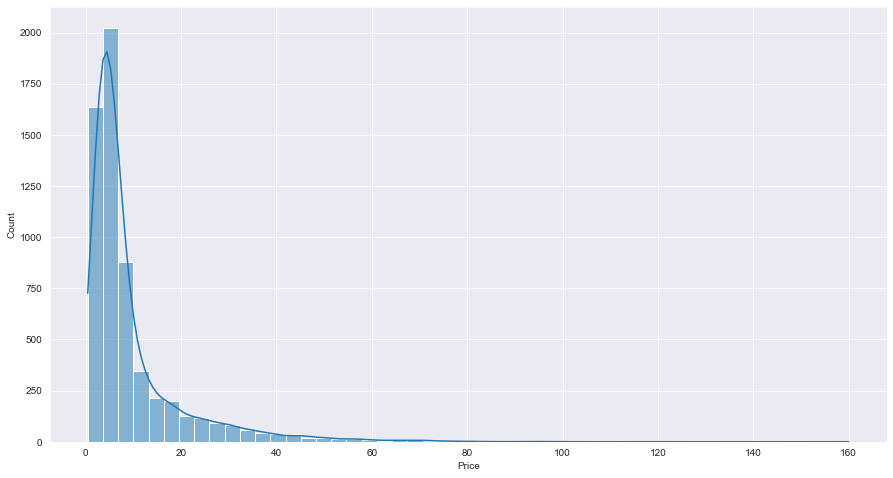

In [63]:
plt.figure(figsize = (15 , 8))
sns.histplot(data = df , x = "Price" , bins = 50 , kde = True)

In [64]:
px.histogram(data_frame = df , x = "Price" , nbins = 100)

In [65]:
px.scatter(y = df.index , x = "Year" , data_frame = df , color = "Price" , hover_data = ["Model" , "Company"])

<AxesSubplot:xlabel='Year'>

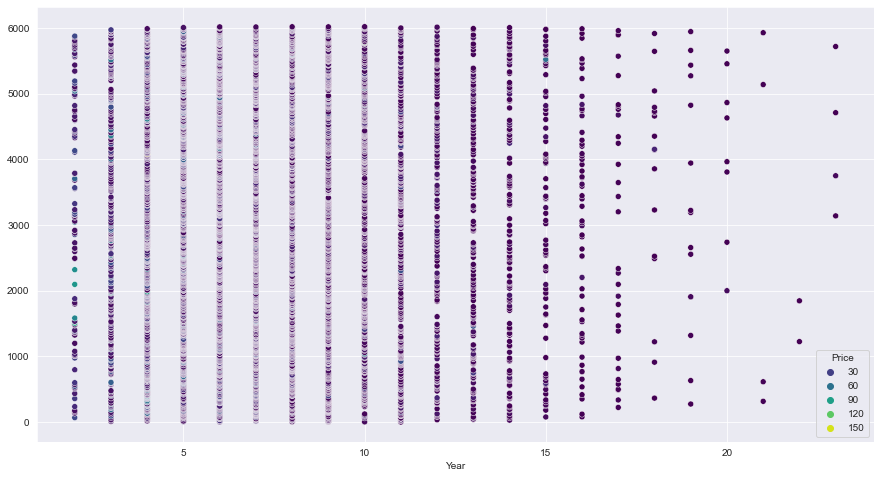

In [70]:
plt.figure(figsize = (15 , 8))
sns.scatterplot(y = df.index , x = "Year" , data = df , hue = "Price" , palette = "viridis" )

In [71]:
px.scatter(y = df.index , x = "KM" , data_frame = df , color = "Price" , hover_data = ["Model" , "Company"])

<AxesSubplot:xlabel='KM'>

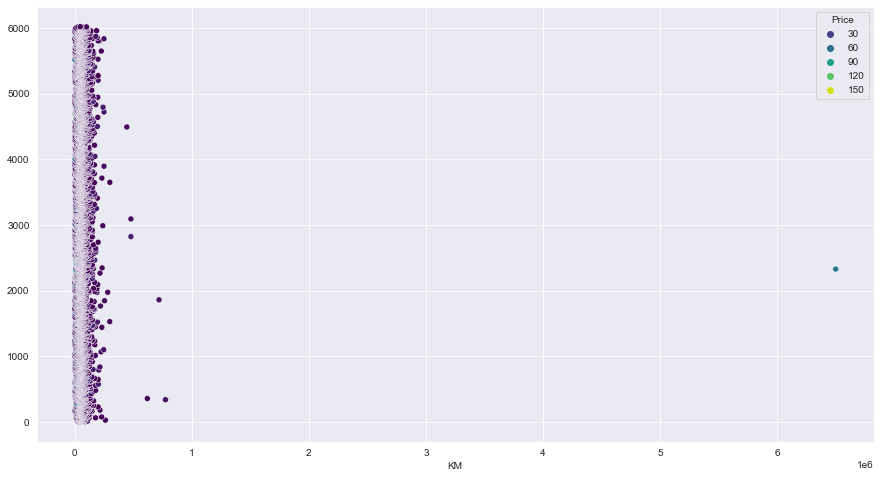

In [72]:
plt.figure(figsize = (15 , 8))
sns.scatterplot(y = df.index , x = "KM" , data = df , hue = "Price" , palette = "viridis" )

KM contains extreme outliners

In [73]:
px.scatter(y = df.index , x = "Mileage" , data_frame = df , color = "Price" , hover_data = ["Model" , "Company"])

<AxesSubplot:xlabel='Mileage'>

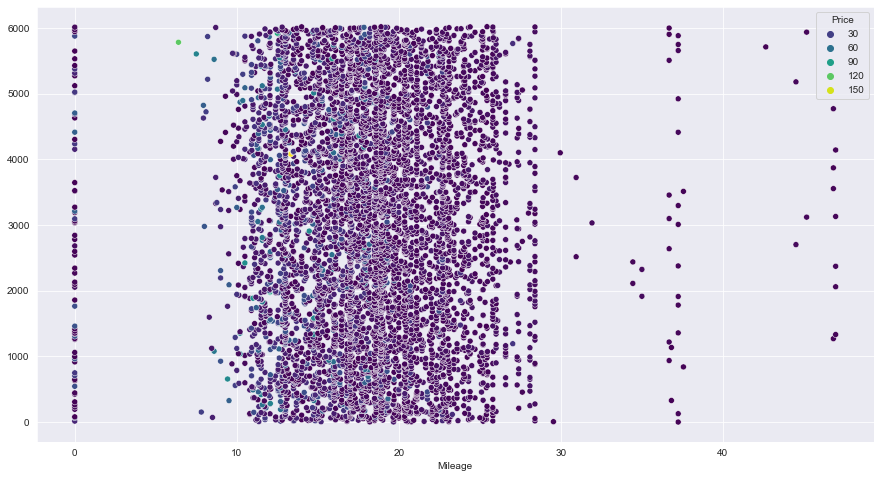

In [74]:
plt.figure(figsize = (15 , 8))
sns.scatterplot(y = df.index , x = "Mileage" , data = df , hue = "Price" , palette = "viridis" )

In [75]:
px.scatter(y = df.index , x = "Engine" , data_frame = df , color = "Price" , hover_data = ["Model" , "Company"])

<AxesSubplot:xlabel='Engine'>

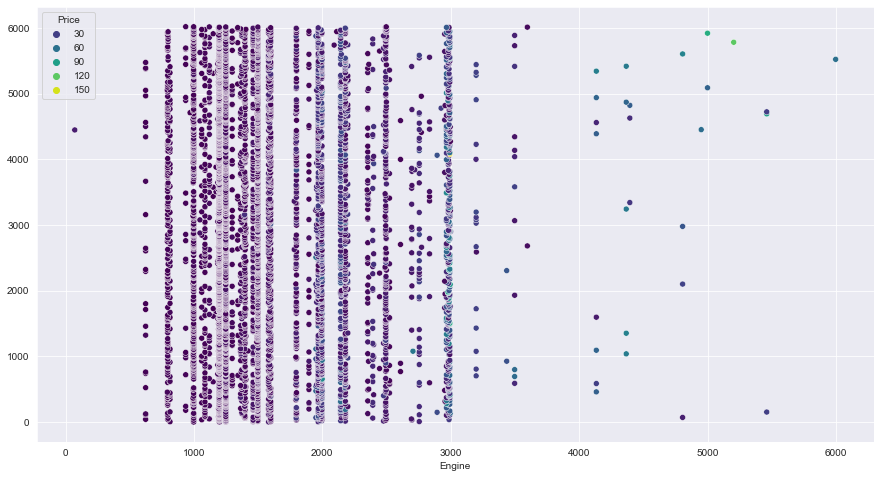

In [76]:
plt.figure(figsize = (15 , 8))
sns.scatterplot(y = df.index , x = "Engine" , data = df , hue = "Price" , palette = "viridis" )

In [77]:
px.scatter(y = df.index , x = "Power" , data_frame = df , color = "Price" , hover_data = ["Model" , "Company"])

<AxesSubplot:xlabel='Power'>

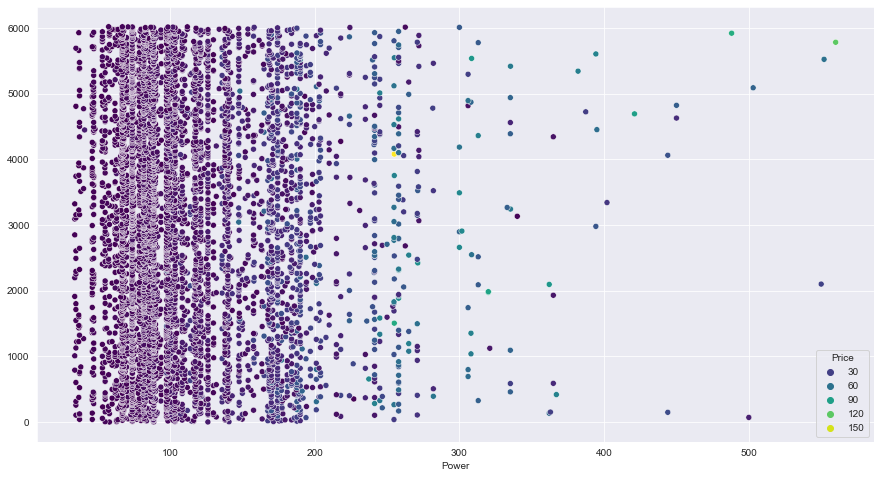

In [78]:
plt.figure(figsize = (15 , 8))
sns.scatterplot(y = df.index , x = "Power" , data = df , hue = "Price" , palette = "viridis" )

In [79]:
px.scatter(y = df.index , x = "Seats" , data_frame = df , color = "Price" , hover_data = ["Model" , "Company"])

<AxesSubplot:xlabel='Seats'>

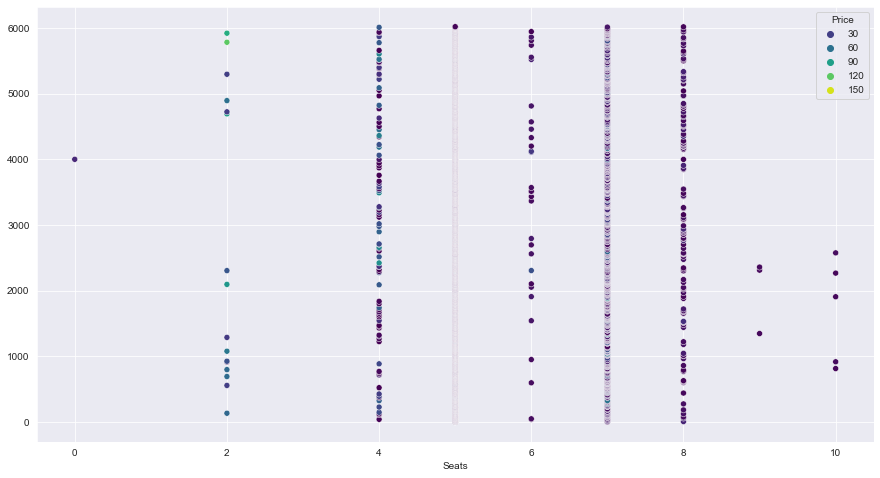

In [80]:
plt.figure(figsize = (15 , 8))
sns.scatterplot(y = df.index , x = "Seats" , data = df , hue = "Price" , palette = "viridis" )

In [81]:
px.bar(df , x = "Model" , color = "Price" , hover_data = ["Model" , "Company"])

<AxesSubplot:xlabel='Model', ylabel='count'>

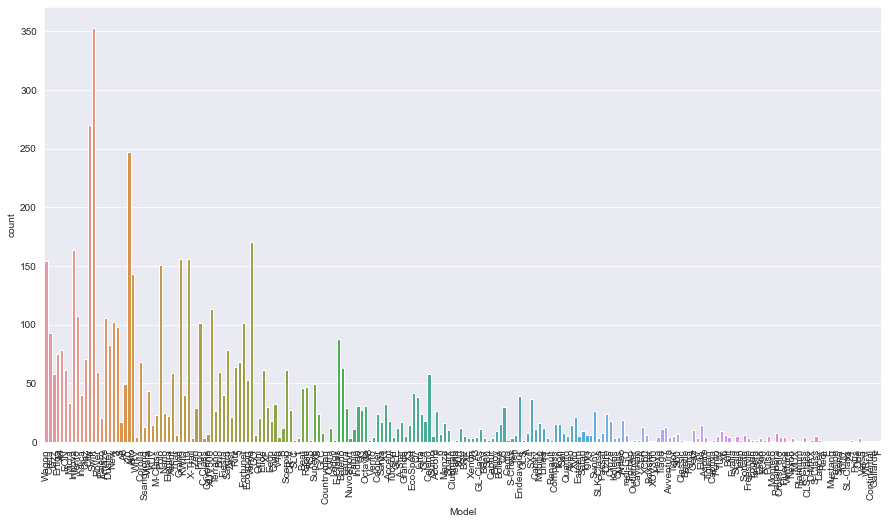

In [97]:
plt.figure(figsize = (15 , 8))
plt.xticks(rotation = 90)
sns.countplot(x = "Model" , data = df)

In [89]:
px.bar(df , x = "Company" , color = "Price" , hover_data = ["Model" , "Company"])

<AxesSubplot:xlabel='Company', ylabel='count'>

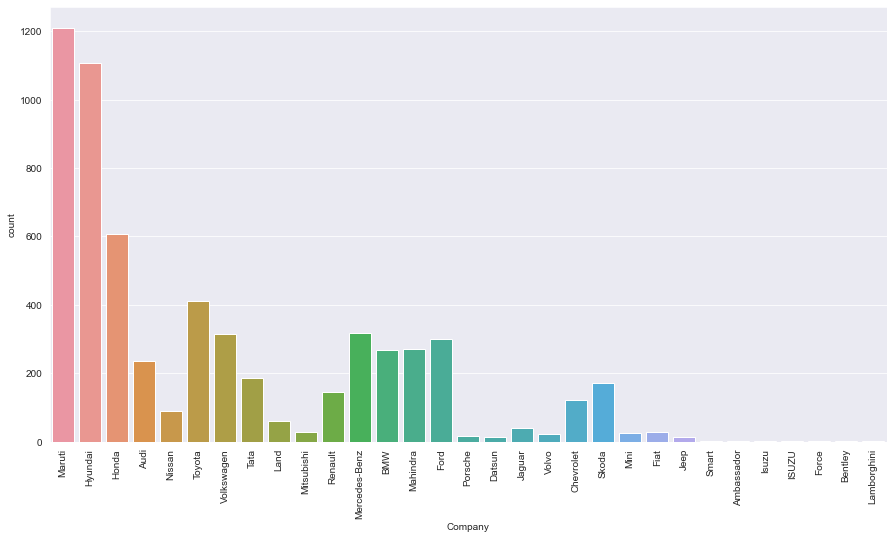

In [98]:
plt.figure(figsize = (15 , 8))
plt.xticks(rotation = 90)
sns.countplot(x = "Company" , data = df)

In [83]:
px.box(df , x = "Fuel" , y = "Price" , color = "Owner_Type" , hover_data = ["Model" , "Company"])

In [91]:
px.box(df , x = "Fuel" , y = "Price" , color = "Transmission" , hover_data = ["Model" , "Company"])

In [92]:
px.box(df , x = "Transmission" , y = "Price" , color = "Owner_Type" , hover_data = ["Model" , "Company"])

In [93]:
px.box(df , x = "Transmission" , y = "Price" , color = "Fuel" , hover_data = ["Model" , "Company"])

### Outliers Treatment

In [83]:
df.head()

Location  Year     KM    Fuel Transmission Owner_Type  Seats  Price  \
0      Mumbai    11  72000     CNG       Manual      First    5.0   1.75   
1        Pune     6  41000  Diesel       Manual      First    5.0  12.50   
2     Chennai    10  46000  Petrol       Manual      First    5.0   4.50   
3     Chennai     9  87000  Diesel       Manual      First    7.0   6.00   
4  Coimbatore     8  40670  Diesel    Automatic     Second    5.0  17.74   

   Mileage  Engine   Power  Company   Model  
0    37.24   998.0   58.16   Maruti   Wagon  
1    19.67  1582.0  126.20  Hyundai   Creta  
2    18.20  1199.0   88.70    Honda    Jazz  
3    20.77  1248.0   88.76   Maruti  Ertiga  
4    15.20  1968.0  140.80     Audi      A4

In [84]:
df.describe()

Year            KM        Seats        Price      Mileage  \
count  6019.000000  6.019000e+03  6019.000000  6019.000000  6019.000000   
mean      7.641801  5.873838e+04     5.276790     9.479468    18.242456   
std       3.269742  9.126884e+04     0.806346    11.187917     4.878822   
min       2.000000  1.710000e+02     0.000000     0.440000     0.000000   
25%       5.000000  3.400000e+04     5.000000     3.500000    15.260000   
50%       7.000000  5.300000e+04     5.000000     5.640000    18.190000   
75%      10.000000  7.300000e+04     5.000000     9.950000    21.100000   
max      23.000000  6.500000e+06    10.000000   160.000000    46.956000   

            Engine        Power  
count  6019.000000  6019.000000  
mean   1620.509221   112.883539  
std     599.635458    53.283701  
min      72.000000    34.200000  
25%    1198.000000    78.000000  
50%    1493.000000    97.700000  
75%    1969.000000   138.030000  
max    5998.000000   560.000000

Removing outliers with more than 99 percentile and less than 1 percentile

In [101]:
df.loc[df["KM"] > np.percentile(df["KM"] , [99])[0] * 3 , ["KM"]] = np.percentile(df["KM"] , [99])[0] * 3

In [102]:
df.loc[df["KM"] < np.percentile(df["KM"] , [1])[0] * 0.3]

Location  Year      KM    Fuel Transmission Owner_Type  Seats  Price  \
173     Kolkata     2  1000.0  Petrol       Manual      First    5.0   6.50   
1161  Ahmedabad     3  1000.0  Petrol    Automatic      First    5.0   6.85   
1198  Hyderabad     2  1000.0  Petrol       Manual      First    5.0   5.68   
1242      Delhi     3  1000.0  Diesel    Automatic      First    5.0  40.00   
1361     Mumbai     2   171.0  Petrol       Manual      First    5.0   3.60   
1598     Jaipur     4  1000.0  Diesel       Manual      First    5.0   7.50   
1726    Kolkata     6  1001.0  Diesel       Manual      First    5.0   7.55   
2054     Mumbai     4  1000.0  Petrol       Manual      First    5.0   6.36   
2646     Mumbai     2  1000.0  Petrol       Manual      First    5.0   6.80   
3769     Mumbai     3  1011.0  Diesel       Manual      First    5.0  13.50   
5249     Jaipur     3  1001.0  Petrol       Manual      First    5.0   7.23   
5339       Pune     2  1000.0  Petrol       Manual      First    5.0   8.60   
5606     Mumbai     2   600.0  Petrol    Automatic      First    5.0   6.25   
5941       Pune     3  1000.0  Petrol       Manual      First    5.0   3.40   
5966  Hyderabad     3  1048.0  Petrol       Manual      First    5.0   4.70   

      Mileage  Engine   Power     Company      Model  
173     18.90  1197.0   81.86     Hyundai      Grand  
1161    20.30  1199.0   84.00        Tata      Tigor  
1198    18.78   999.0   75.00  Volkswagen       Polo  
1242    13.60  1999.0  177.00      Jaguar         XE  
1361    24.70   796.0   47.30      Maruti       Alto  
1598    13.49  2179.0  138.03        Tata      Xenon  
1726    25.83  1498.0   99.00        Ford       Figo  
2054    20.89  1197.0   81.80      Maruti      Ignis  
2646    18.12  1196.0   86.80        Ford       Figo  
3769    20.37  1461.0  108.45     Renault     Captur  
5249    19.00  1194.0   94.68        Ford  Freestyle  
5339    17.19  1197.0   81.86     Hyundai        i20  
5606    21.50  1197.0   81.80      Maruti      Wagon  
5941    25.17   799.0   53.30     Renault       KWID  
5966    18.90   998.0   67.10      Maruti      Wagon

In [103]:
df.loc[df["KM"] < np.percentile(df["KM"] , [1])[0] * 0.3 , ["KM"]] = np.percentile(df["KM"] , [1])[0] * 0.3

In [104]:
df.loc[df["Mileage"] > np.percentile(df["Mileage"] , [99])[0] * 3]

Empty DataFrame
Columns: [Location, Year, KM, Fuel, Transmission, Owner_Type, Seats, Price, Mileage, Engine, Power, Company, Model]
Index: []

In [105]:
df.loc[df["Mileage"] < np.percentile(df["Mileage"] , [1])[0]]

Empty DataFrame
Columns: [Location, Year, KM, Fuel, Transmission, Owner_Type, Seats, Price, Mileage, Engine, Power, Company, Model]
Index: []

In [106]:
df.loc[df["Engine"] > np.percentile(df["Engine"] , [99])[0] * 3]

Empty DataFrame
Columns: [Location, Year, KM, Fuel, Transmission, Owner_Type, Seats, Price, Mileage, Engine, Power, Company, Model]
Index: []

In [107]:
df.loc[df["Engine"] < np.percentile(df["Engine"] , [1])[0] * 0.3 , ["Engine"]] = np.percentile(df["Engine"] , [1])[0] * 0.3

In [108]:
df.loc[df["Power"] > np.percentile(df["Power"] , [99])[0] * 3]

Empty DataFrame
Columns: [Location, Year, KM, Fuel, Transmission, Owner_Type, Seats, Price, Mileage, Engine, Power, Company, Model]
Index: []

In [109]:
df.loc[df["Power"] < np.percentile(df["Power"] , [1])[0] * 0.3 , ["Power"]] = np.percentile(df["Power"] , [1])[0] * 0.3

In [110]:
df.describe()

Year             KM        Seats        Price      Mileage  \
count  6019.000000    6019.000000  6019.000000  6019.000000  6019.000000   
mean      7.641801   57652.366752     5.276790     9.479468    18.242456   
std       3.269742   36941.615987     0.806346    11.187917     4.878822   
min       2.000000    1211.232000     0.000000     0.440000     0.000000   
25%       5.000000   34000.000000     5.000000     3.500000    15.260000   
50%       7.000000   53000.000000     5.000000     5.640000    18.190000   
75%      10.000000   73000.000000     5.000000     9.950000    21.100000   
max      23.000000  518487.000000    10.000000   160.000000    46.956000   

            Engine        Power  
count  6019.000000  6019.000000  
mean   1620.536933   112.883539  
std     599.567732    53.283701  
min     238.800000    34.200000  
25%    1198.000000    78.000000  
50%    1493.000000    97.700000  
75%    1969.000000   138.030000  
max    5998.000000   560.000000

In [111]:
df.head()

Location  Year       KM    Fuel Transmission Owner_Type  Seats  Price  \
0      Mumbai    11  72000.0     CNG       Manual      First    5.0   1.75   
1        Pune     6  41000.0  Diesel       Manual      First    5.0  12.50   
2     Chennai    10  46000.0  Petrol       Manual      First    5.0   4.50   
3     Chennai     9  87000.0  Diesel       Manual      First    7.0   6.00   
4  Coimbatore     8  40670.0  Diesel    Automatic     Second    5.0  17.74   

   Mileage  Engine   Power  Company   Model  
0    37.24   998.0   58.16   Maruti   Wagon  
1    19.67  1582.0  126.20  Hyundai   Creta  
2    18.20  1199.0   88.70    Honda    Jazz  
3    20.77  1248.0   88.76   Maruti  Ertiga  
4    15.20  1968.0  140.80     Audi      A4

### Scaling outliners

In [112]:
for i in ["KM" , "Seats" , "Mileage" , "Engine" , "Power"]:
    df[i] = np.log(df[i] + 1)
    tt[i] = np.log(tt[i] + 1)

In [113]:
df.head()

Location  Year         KM    Fuel Transmission Owner_Type     Seats  \
0      Mumbai    11  11.184435     CNG       Manual      First  1.791759   
1        Pune     6  10.621352  Diesel       Manual      First  1.791759   
2     Chennai    10  10.736418  Petrol       Manual      First  1.791759   
3     Chennai     9  11.373675  Diesel       Manual      First  2.079442   
4  Coimbatore     8  10.613271  Diesel    Automatic     Second  1.791759   

   Price   Mileage    Engine     Power  Company   Model  
0   1.75  3.643882  6.906755  4.080246   Maruti   Wagon  
1  12.50  3.028683  7.367077  4.845761  Hyundai   Creta  
2   4.50  2.954910  7.090077  4.496471    Honda    Jazz  
3   6.00  3.080533  7.130099  4.497139   Maruti  Ertiga  
4  17.74  2.785011  7.585281  4.954418     Audi      A4

In [114]:
tt.head()

Location  Year         KM    Fuel Transmission Owner_Type     Seats  \
0       Delhi     7  10.619619     CNG       Manual      First  1.609438   
1  Coimbatore     8  10.905846  Petrol       Manual     Second  1.791759   
2      Mumbai     4  10.434145  Diesel       Manual      First  2.079442   
3   Hyderabad     9  11.842236  Diesel       Manual      First  1.791759   
4      Mumbai     7  10.275086  Petrol       Manual      First  1.791759   

    Mileage    Engine     Power  Company   Model  
0  3.832200  6.906755  4.080922   Maruti    Alto  
1  3.246491  6.680855  3.877432   Maruti    Alto  
2  2.686486  7.780721  5.002603   Toyota  Innova  
3  3.202340  7.218910  4.592085   Toyota   Etios  
4  2.970414  7.088409  4.429029  Hyundai     i20

## Label Encoding

In [115]:
tr = df[["Company" , "Model"]]
tr["Source"] = "Train"
tr.head()

Company   Model Source
0   Maruti   Wagon  Train
1  Hyundai   Creta  Train
2    Honda    Jazz  Train
3   Maruti  Ertiga  Train
4     Audi      A4  Train

In [116]:
te = tt[["Company" , "Model"]]
te["Source"] = "Test"
te.head()

Company   Model Source
0   Maruti    Alto   Test
1   Maruti    Alto   Test
2   Toyota  Innova   Test
3   Toyota   Etios   Test
4  Hyundai     i20   Test

In [117]:
res = pd.concat([tr , te])
res

Company    Model Source
0            Maruti    Wagon  Train
1           Hyundai    Creta  Train
2             Honda     Jazz  Train
3            Maruti   Ertiga  Train
4              Audi       A4  Train
...             ...      ...    ...
1229     Volkswagen    Vento   Test
1230     Volkswagen     Polo   Test
1231         Nissan    Micra   Test
1232     Volkswagen     Polo   Test
1233  Mercedes-Benz  E-Class   Test

[7253 rows x 3 columns]

In [118]:
from sklearn.preprocessing import LabelEncoder
lb1 = lb2 = LabelEncoder()
res["Company"] = lb1.fit_transform(res["Company"])
res["Model"] = lb2.fit_transform(res["Model"])

In [119]:
res.head()

Company  Model Source
0       19    196  Train
1       11     56  Train
2       10    103  Train
3       19     72  Train
4        1     12  Train

In [120]:
res.tail()

Company  Model Source
1229       31    188   Test
1230       31    138   Test
1231       23    119   Test
1232       31    138   Test
1233       20     63   Test

In [121]:
df["Company"] = res["Company"].loc[res["Source"] == "Train"] 
df["Model"] = res["Model"].loc[res["Source"] == "Train"]

In [122]:
tt["Company"] = res["Company"].loc[res["Source"] == "Test"] 
tt["Model"] = res["Model"].loc[res["Source"] == "Test"]

## Getting Dummie columns

In [123]:
df = pd.get_dummies(df , columns = ["Location" , "Fuel" , "Transmission"] , prefix = ["Location" , "Fuel" , "Transmission"] )
tt = pd.get_dummies(tt , columns = ["Location" , "Fuel" , "Transmission"] , prefix = ["Location" , "Fuel" , "Transmission"] )

In [124]:
df["Owner_Type"] = df["Owner_Type"].map({"First" : 1 , "Second" : 2 , "Third" : 3, "Fourth & Above" : 4})

In [125]:
df["Owner_Type"].unique()

array([1, 2, 4, 3], dtype=int64)

In [126]:
tt["Owner_Type"] = tt["Owner_Type"].map({"First" : 1 , "Second" : 2 , "Third" : 3, "Fourth & Above" : 4})

In [127]:
tt["Owner_Type"].unique()

array([1, 2, 3, 4], dtype=int64)

In [128]:
df.head().T

0          1           2          3  \
Year                     11.000000   6.000000   10.000000   9.000000   
KM                       11.184435  10.621352   10.736418  11.373675   
Owner_Type                1.000000   1.000000    1.000000   1.000000   
Seats                     1.791759   1.791759    1.791759   2.079442   
Price                     1.750000  12.500000    4.500000   6.000000   
Mileage                   3.643882   3.028683    2.954910   3.080533   
Engine                    6.906755   7.367077    7.090077   7.130099   
Power                     4.080246   4.845761    4.496471   4.497139   
Company                  19.000000  11.000000   10.000000  19.000000   
Model                   196.000000  56.000000  103.000000  72.000000   
Location_Ahmedabad        0.000000   0.000000    0.000000   0.000000   
Location_Bangalore        0.000000   0.000000    0.000000   0.000000   
Location_Chennai          0.000000   0.000000    1.000000   1.000000   
Location_Coimbatore       0.000000   0.000000    0.000000   0.000000   
Location_Delhi            0.000000   0.000000    0.000000   0.000000   
Location_Hyderabad        0.000000   0.000000    0.000000   0.000000   
Location_Jaipur           0.000000   0.000000    0.000000   0.000000   
Location_Kochi            0.000000   0.000000    0.000000   0.000000   
Location_Kolkata          0.000000   0.000000    0.000000   0.000000   
Location_Mumbai           1.000000   0.000000    0.000000   0.000000   
Location_Pune             0.000000   1.000000    0.000000   0.000000   
Fuel_CNG                  1.000000   0.000000    0.000000   0.000000   
Fuel_Diesel               0.000000   1.000000    0.000000   1.000000   
Fuel_Electric             0.000000   0.000000    0.000000   0.000000   
Fuel_LPG                  0.000000   0.000000    0.000000   0.000000   
Fuel_Petrol               0.000000   0.000000    1.000000   0.000000   
Transmission_Automatic    0.000000   0.000000    0.000000   0.000000   
Transmission_Manual       1.000000   1.000000    1.000000   1.000000   

                                4  
Year                     8.000000  
KM                      10.613271  
Owner_Type               2.000000  
Seats                    1.791759  
Price                   17.740000  
Mileage                  2.785011  
Engine                   7.585281  
Power                    4.954418  
Company                  1.000000  
Model                   12.000000  
Location_Ahmedabad       0.000000  
Location_Bangalore       0.000000  
Location_Chennai         0.000000  
Location_Coimbatore      1.000000  
Location_Delhi           0.000000  
Location_Hyderabad       0.000000  
Location_Jaipur          0.000000  
Location_Kochi           0.000000  
Location_Kolkata         0.000000  
Location_Mumbai          0.000000  
Location_Pune            0.000000  
Fuel_CNG                 0.000000  
Fuel_Diesel              1.000000  
Fuel_Electric            0.000000  
Fuel_LPG                 0.000000  
Fuel_Petrol              0.000000  
Transmission_Automatic   1.000000  
Transmission_Manual      0.000000

In [129]:
tt.head().T

0          1           2          3  \
Year                     7.000000   8.000000    4.000000   9.000000   
KM                      10.619619  10.905846   10.434145  11.842236   
Owner_Type               1.000000   2.000000    1.000000   1.000000   
Seats                    1.609438   1.791759    2.079442   1.791759   
Mileage                  3.832200   3.246491    2.686486   3.202340   
Engine                   6.906755   6.680855    7.780721   7.218910   
Power                    4.080922   3.877432    5.002603   4.592085   
Company                 19.000000  19.000000   30.000000  30.000000   
Model                   19.000000  19.000000  102.000000  75.000000   
Location_Ahmedabad       0.000000   0.000000    0.000000   0.000000   
Location_Bangalore       0.000000   0.000000    0.000000   0.000000   
Location_Chennai         0.000000   0.000000    0.000000   0.000000   
Location_Coimbatore      0.000000   1.000000    0.000000   0.000000   
Location_Delhi           1.000000   0.000000    0.000000   0.000000   
Location_Hyderabad       0.000000   0.000000    0.000000   1.000000   
Location_Jaipur          0.000000   0.000000    0.000000   0.000000   
Location_Kochi           0.000000   0.000000    0.000000   0.000000   
Location_Kolkata         0.000000   0.000000    0.000000   0.000000   
Location_Mumbai          0.000000   0.000000    1.000000   0.000000   
Location_Pune            0.000000   0.000000    0.000000   0.000000   
Fuel_CNG                 1.000000   0.000000    0.000000   0.000000   
Fuel_Diesel              0.000000   0.000000    1.000000   1.000000   
Fuel_LPG                 0.000000   0.000000    0.000000   0.000000   
Fuel_Petrol              0.000000   1.000000    0.000000   0.000000   
Transmission_Automatic   0.000000   0.000000    0.000000   0.000000   
Transmission_Manual      1.000000   1.000000    1.000000   1.000000   

                                 4  
Year                      7.000000  
KM                       10.275086  
Owner_Type                1.000000  
Seats                     1.791759  
Mileage                   2.970414  
Engine                    7.088409  
Power                     4.429029  
Company                  11.000000  
Model                   217.000000  
Location_Ahmedabad        0.000000  
Location_Bangalore        0.000000  
Location_Chennai          0.000000  
Location_Coimbatore       0.000000  
Location_Delhi            0.000000  
Location_Hyderabad        0.000000  
Location_Jaipur           0.000000  
Location_Kochi            0.000000  
Location_Kolkata          0.000000  
Location_Mumbai           1.000000  
Location_Pune             0.000000  
Fuel_CNG                  0.000000  
Fuel_Diesel               0.000000  
Fuel_LPG                  0.000000  
Fuel_Petrol               1.000000  
Transmission_Automatic    0.000000  
Transmission_Manual       1.000000

In [130]:
df.isna().sum()

Year                      0
KM                        0
Owner_Type                0
Seats                     0
Price                     0
Mileage                   0
Engine                    0
Power                     0
Company                   0
Model                     0
Location_Ahmedabad        0
Location_Bangalore        0
Location_Chennai          0
Location_Coimbatore       0
Location_Delhi            0
Location_Hyderabad        0
Location_Jaipur           0
Location_Kochi            0
Location_Kolkata          0
Location_Mumbai           0
Location_Pune             0
Fuel_CNG                  0
Fuel_Diesel               0
Fuel_Electric             0
Fuel_LPG                  0
Fuel_Petrol               0
Transmission_Automatic    0
Transmission_Manual       0
dtype: int64

In [131]:
tt.isna().sum()

Year                      0
KM                        0
Owner_Type                0
Seats                     0
Mileage                   0
Engine                    0
Power                     0
Company                   0
Model                     0
Location_Ahmedabad        0
Location_Bangalore        0
Location_Chennai          0
Location_Coimbatore       0
Location_Delhi            0
Location_Hyderabad        0
Location_Jaipur           0
Location_Kochi            0
Location_Kolkata          0
Location_Mumbai           0
Location_Pune             0
Fuel_CNG                  0
Fuel_Diesel               0
Fuel_LPG                  0
Fuel_Petrol               0
Transmission_Automatic    0
Transmission_Manual       0
dtype: int64

## Train Test Split

In [132]:
X = df.drop(["Price"] , axis = 1)
y = df["Price"]

In [133]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(4815, 1204, 4815, 1204)

## Fearture Scaling

In [134]:
ints

['Year', 'KM', 'Seats', 'Mileage', 'Engine', 'Power']

In [135]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[ints] = scaler.fit_transform(X_train[ints])
X_test[ints] = scaler.transform(X_test[ints])
tt[ints] = scaler.transform(tt[ints])

In [136]:
X_train.head()

Year        KM  Owner_Type     Seats   Mileage    Engine     Power  \
4248  0.736105  0.688098           1 -0.310580  0.168561 -0.712615 -0.635895   
4129 -0.185622  0.455171           1 -0.310580  0.690803 -0.056509 -0.109919   
2534 -1.414591 -3.953539           1 -0.310580  0.859691 -0.594587 -0.372414   
2893  0.736105  1.650961           1  3.053015 -0.744338  1.446029 -0.060818   
2860 -1.107349  1.053555           1 -0.310580  0.711228 -0.594587 -0.806741   

      Company  Model  Location_Ahmedabad  ...  Location_Kolkata  \
4248        4     29                   0  ...                 0   
4129        8     65                   0  ...                 0   
2534       19    193                   0  ...                 1   
2893       30    102                   0  ...                 0   
2860       29     32                   0  ...                 0   

      Location_Mumbai  Location_Pune  Fuel_CNG  Fuel_Diesel  Fuel_Electric  \
4248                0              0         0            0              0   
4129                0              0         0            1              0   
2534                0              0         0            1              0   
2893                0              0         0            1              0   
2860                0              0         0            1              0   

      Fuel_LPG  Fuel_Petrol  Transmission_Automatic  Transmission_Manual  
4248         0            1                       0                    1  
4129         0            0                       0                    1  
2534         0            0                       0                    1  
2893         0            0                       0                    1  
2860         0            0                       0                    1  

[5 rows x 27 columns]

In [137]:
X_test.head()

Year        KM  Owner_Type     Seats   Mileage    Engine     Power  \
2868  0.121621  0.547953           1 -0.310580  0.761626 -0.594587 -0.806741   
5924 -1.107349 -0.798469           1  2.075929 -0.314028  0.790910  0.368585   
3764 -0.185622  0.860789           1  2.075929 -0.364012  1.048007  0.744474   
4144 -0.800106  0.146168           2 -0.310580  0.933582 -0.264336 -0.975925   
2780  1.350590  1.075023           1 -0.310580 -7.887381 -0.066363 -0.131978   

      Company  Model  Location_Ahmedabad  ...  Location_Kolkata  \
2868       19    176                   0  ...                 0   
5924       18    168                   0  ...                 0   
3764       18    208                   0  ...                 0   
4144       29    101                   0  ...                 0   
2780       11    166                   0  ...                 0   

      Location_Mumbai  Location_Pune  Fuel_CNG  Fuel_Diesel  Fuel_Electric  \
2868                0              0         0            1              0   
5924                0              0         0            1              0   
3764                0              0         0            1              0   
4144                0              1         0            1              0   
2780                0              1         0            0              0   

      Fuel_LPG  Fuel_Petrol  Transmission_Automatic  Transmission_Manual  
2868         0            0                       0                    1  
5924         0            0                       0                    1  
3764         0            0                       0                    1  
4144         0            0                       0                    1  
2780         0            1                       0                    1  

[5 rows x 27 columns]

In [138]:
for i in X_train.columns:
    if i not in tt.columns:
        print(i)

Fuel_Electric


In [139]:
tt["Fuel_Electric"] = 0

In [140]:
tt = tt[X_train.columns]
tt.head()

Year        KM  Owner_Type     Seats   Mileage    Engine     Power  \
0 -0.185622 -0.193887           1 -1.823055  2.487909 -1.253250 -1.388053   
1  0.121621  0.212684           2 -0.310580  0.902161 -1.919452 -1.888086   
2 -1.107349 -0.457342           1  2.075929 -0.613995  1.324163  0.876783   
3  0.428863  1.542778           1 -0.310580  0.782626 -0.332674 -0.131978   
4 -0.185622 -0.683278           1 -0.310580  0.154712 -0.717534 -0.532652   

   Company  Model  Location_Ahmedabad  ...  Location_Kolkata  Location_Mumbai  \
0       19     19                   0  ...                 0                0   
1       19     19                   0  ...                 0                0   
2       30    102                   0  ...                 0                1   
3       30     75                   0  ...                 0                0   
4       11    217                   0  ...                 0                1   

   Location_Pune  Fuel_CNG  Fuel_Diesel  Fuel_Electric  Fuel_LPG  Fuel_Petrol  \
0              0         1            0              0         0            0   
1              0         0            0              0         0            1   
2              0         0            1              0         0            0   
3              0         0            1              0         0            0   
4              0         0            0              0         0            1   

   Transmission_Automatic  Transmission_Manual  
0                       0                    1  
1                       0                    1  
2                       0                    1  
3                       0                    1  
4                       0                    1  

[5 rows x 27 columns]

## Model Fitting and Evaluation

In [141]:
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn.metrics import mean_squared_log_error , mean_squared_error , mean_absolute_error , r2_score
from sklearn.model_selection import cross_val_score

In [142]:
models = []
models.append(['XGBRegressor', XGBRegressor(random_state = 42 , objective ='reg:squarederror')])
models.append(['AdaBoostRegressor', AdaBoostRegressor(random_state = 42)])
models.append(['RandomForest Regressor', RandomForestRegressor(random_state = 42)])
models.append(['KNeigbors Regressor', KNeighborsRegressor()])

In [143]:
def metrics(model , X_train , y_train , X_test , y_test , params = False):
    
    mod = model[1].fit(X_train , y_train)
    preds = model[1].predict(X_test)
    accuracies = cross_val_score(estimator = model[1], X = X_train , y = y_train, cv = 10)
    log = mean_squared_log_error(preds , y_test)
    mse = mean_squared_error(preds , y_test , squared = False)
    mae = mean_absolute_error(preds , y_test)
    score = max(0 , 100 * r2_score(y_test , preds))
    
    print("\n")            
    print(model[0])
    
    print("\n")
    if params:
        print(f"Best Parameters are : \n" , model[1].best_params_)
        print("\n")
    
    print(f"Training score : {model[1].score(X_train , y_train):.4f}")
    print("\n") 
    
    print(f"Test Score : {model[1].score(X_test , y_test):.4f}")
    print("\n")
    
    print(f"K-fold accuracy : {np.mean(accuracies):.4f}")
    print("\n")
    
    print(f"Standard Deviation of Accuracies in k-fold : {np.std(accuracies):.4f}")
    print("\n")
    
    print(f"Mean Absolute Error : {mae:.4f}")
    print("\n")

    print(f"Root Mean Squared Error : {mse:.4f}")
    print("\n")

    print(f"Mean Squared Log Error : {log:.4f}")
    print("\n")
    
    print(f"R2_score : {score:.4f}")
                
    print("\n")            
    
    plt.scatter(y_test , preds)
    x = np.linspace(min(y_test) , max(y_test) , 100)
    y = x
    plt.plot(x, y , "-r")
    plt.show()
    print("\n")

    print("*"*100)
    
    print("\n\n")
    
    sam = []
    sam.append(model[0])
    sam.append(model[1].score(X_train , y_train))
    sam.append(model[1].score(X_test , y_test))
    sam.append(np.mean(accuracies))
    sam.append(np.std(accuracies))
    sam.append(mae)
    sam.append(mse)
    sam.append(log)
    sam.append(score)
    
    return sam , mod



XGBRegressor


Training score : 0.9967


Test Score : 0.9012


K-fold accuracy : 0.9087


Standard Deviation of Accuracies in k-fold : 0.0424


Mean Absolute Error : 1.3778


Root Mean Squared Error : 3.4869


Mean Squared Log Error : 0.0396


R2_score : 90.1196




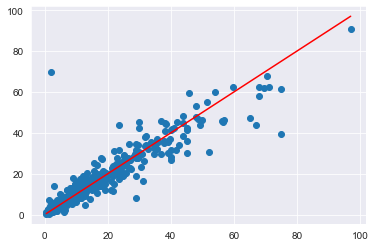



****************************************************************************************************





AdaBoostRegressor


Training score : 0.4185


Test Score : 0.3318


K-fold accuracy : 0.4989


Standard Deviation of Accuracies in k-fold : 0.1065


Mean Absolute Error : 8.2393


Root Mean Squared Error : 9.0682


Mean Squared Log Error : 0.8713


R2_score : 33.1774




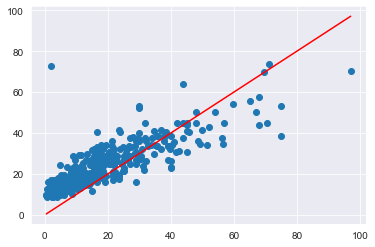



****************************************************************************************************





RandomForest Regressor


Training score : 0.9857


Test Score : 0.8689


K-fold accuracy : 0.9029


Standard Deviation of Accuracies in k-fold : 0.0447


Mean Absolute Error : 1.5931


Root Mean Squared Error : 4.0166


Mean Squared Log Error : 0.0471


R2_score : 86.8899




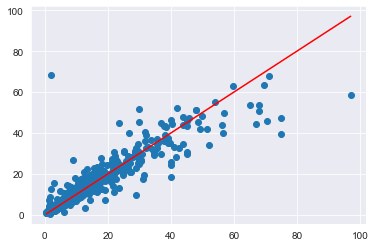



****************************************************************************************************





KNeigbors Regressor


Training score : 0.8919


Test Score : 0.8803


K-fold accuracy : 0.8415


Standard Deviation of Accuracies in k-fold : 0.0545


Mean Absolute Error : 1.7582


Root Mean Squared Error : 3.8386


Mean Squared Log Error : 0.0549


R2_score : 88.0262




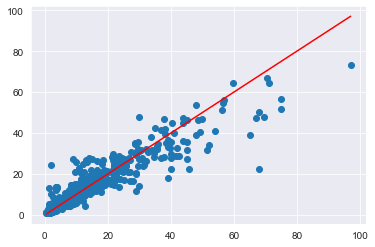



****************************************************************************************************



Wall time: 34.7 s


In [144]:
%%time

pre_final = []
for i in models:
    sam = metrics(i , X_train , y_train , X_test , y_test)
    pre_final.append(sam)

In [145]:
pre_final

[(['XGBRegressor',
   0.996682074459879,
   0.9011962859204917,
   0.9087009018857023,
   0.04235406339531109,
   1.3778262042642828,
   3.4869377470480463,
   0.03964413087402634,
   90.11962859204917],
  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None)),
 (['AdaBoostRegressor',
   0.41854962056735967,
   0.3317744710675178,
   0.4988910221291344,
   0.10649306769001166,
   8.23933867469337,
   9.068158250742966,
   0.8713200397994904,
   33.1774471067517

In [146]:
data_pre_final = [x[0] for x in pre_final]
data_pre_final

[['XGBRegressor',
  0.996682074459879,
  0.9011962859204917,
  0.9087009018857023,
  0.04235406339531109,
  1.3778262042642828,
  3.4869377470480463,
  0.03964413087402634,
  90.11962859204917],
 ['AdaBoostRegressor',
  0.41854962056735967,
  0.3317744710675178,
  0.4988910221291344,
  0.10649306769001166,
  8.23933867469337,
  9.068158250742966,
  0.8713200397994904,
  33.17744710675178],
 ['RandomForest Regressor',
  0.9857081385907479,
  0.8688986361305422,
  0.9028813416413735,
  0.044710317337492485,
  1.5931092617861098,
  4.01662385894986,
  0.04708370122990047,
  86.88986361305422],
 ['KNeigbors Regressor',
  0.8918877262151782,
  0.8802618746125163,
  0.8414661411432982,
  0.0545283545462982,
  1.7582126245847176,
  3.8386081944412997,
  0.054886967767589605,
  88.02618746125162]]

## Visualization of Model Evaluation on X_test

In [147]:
me = pd.DataFrame(data_pre_final , columns = ["Model" , "Train Score" , "Test Score" , "K-fold Accuracy" , "K-fold Std" , "MAE" , "RMSE" , "MLSE" , "R2_Score"])

me.sort_values(by = ["R2_Score" , "MLSE" , "RMSE" , "K-fold Accuracy" , "MAE" , "Train Score" , "Test Score"] , inplace = True , ascending = (False , True , True , False , True , False , False))
me = me.reset_index(drop = True)
me

Model  Train Score  Test Score  K-fold Accuracy  \
0            XGBRegressor     0.996682    0.901196         0.908701   
1     KNeigbors Regressor     0.891888    0.880262         0.841466   
2  RandomForest Regressor     0.985708    0.868899         0.902881   
3       AdaBoostRegressor     0.418550    0.331774         0.498891   

   K-fold Std       MAE      RMSE      MLSE   R2_Score  
0    0.042354  1.377826  3.486938  0.039644  90.119629  
1    0.054528  1.758213  3.838608  0.054887  88.026187  
2    0.044710  1.593109  4.016624  0.047084  86.889864  
3    0.106493  8.239339  9.068158  0.871320  33.177447

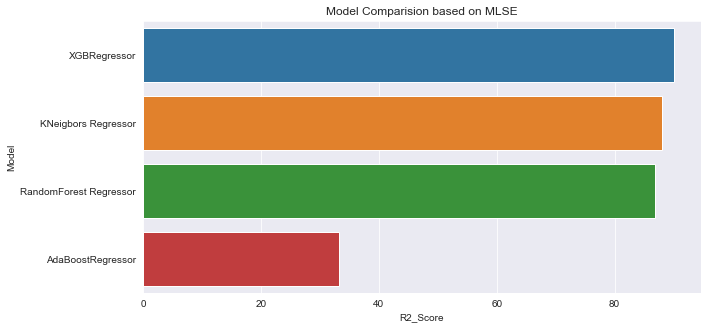

In [148]:
plt.figure(figsize = (10 , 5))
sns.barplot(y = "Model" , x = "R2_Score" , data = me)
plt.title("Model Comparision based on MLSE");

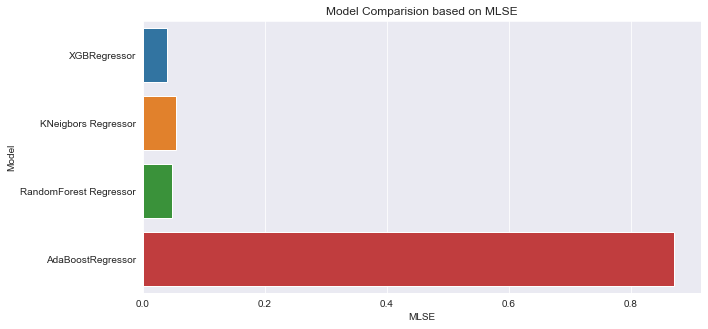

In [149]:
plt.figure(figsize = (10 , 5))
sns.barplot(y = "Model" , x = "MLSE" , data = me)
plt.title("Model Comparision based on MLSE");

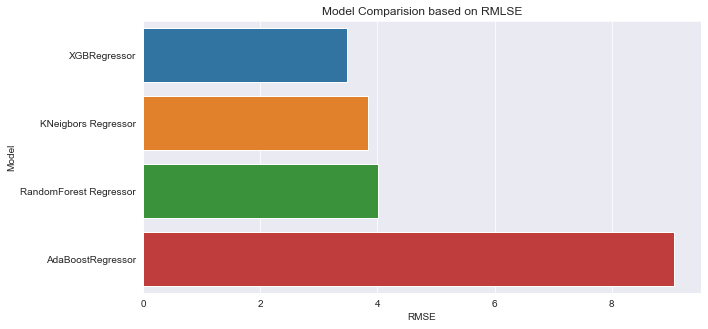

In [150]:
plt.figure(figsize = (10 , 5))
sns.barplot(y = "Model" , x = "RMSE" , data = me)
plt.title("Model Comparision based on RMLSE");

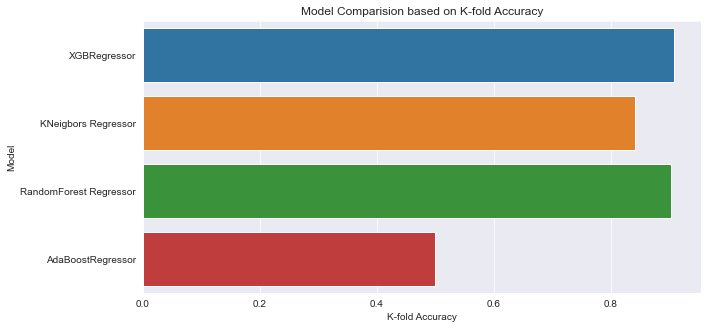

In [151]:
plt.figure(figsize = (10 , 5))
sns.barplot(y = "Model" , x = "K-fold Accuracy" , data = me)
plt.title("Model Comparision based on K-fold Accuracy");

## Grid SearchCV

In [152]:
from sklearn.model_selection import GridSearchCV


grid_xgb = {"n_estimators" : [100 , 200 , 300 , 400]}


grid_random = {"n_estimators" : [100 , 200 , 250 , 300], 
              "max_features" : ['auto', 'sqrt' , "log2"] , 
              "min_samples_leaf" : [2, 4] , 
              "max_depth" : [5 , 7 , 10]}



grid_neighbor = {"n_neighbors" : [5 , 7 , 10 , 12] , 
                "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"]}



XGBRegressor


Best Parameters are : 
 {'n_estimators': 100}


Training score : -0.0059


Test Score : -0.0396


K-fold accuracy : nan


Standard Deviation of Accuracies in k-fold : nan


Mean Absolute Error : 1.3778


Root Mean Squared Error : 3.4869


Mean Squared Log Error : 0.0396


R2_score : 90.1196




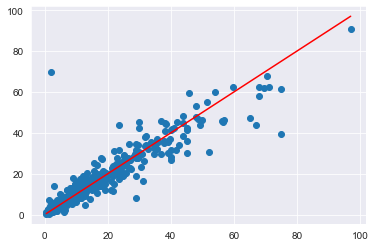



****************************************************************************************************



Wall time: 2min 59s


In [760]:
%%time

xgb = metrics(['XGBRegressor', GridSearchCV(XGBRegressor(random_state = 42 , objective ='reg:squarederror') , param_grid = grid_xgb , cv = 5 , verbose = 0 , scoring = "neg_mean_squared_log_error")] ,  X_train , y_train , X_test , y_test , params = True )

Can run this cell if have more computation power

In [153]:
# %%time

# random = metrics(['RandomForest Regressor', GridSearchCV(RandomForestRegressor(random_state = 42) , param_grid = grid_random , cv = 5 , verbose = 0 , scoring = "neg_mean_squared_log_error"  , n_jobs = -1)] ,  X_train , y_train , X_test , y_test , params = True )



KNN Regressor


Best Parameters are : 
 {'algorithm': 'auto', 'n_neighbors': 5}


Training score : -0.0304


Test Score : -0.0549


K-fold accuracy : -0.0512


Standard Deviation of Accuracies in k-fold : 0.0125


Mean Absolute Error : 1.7582


Root Mean Squared Error : 3.8386


Mean Squared Log Error : 0.0549


R2_score : 88.0262




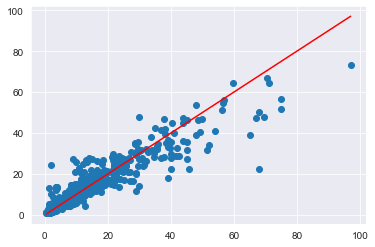



****************************************************************************************************



Wall time: 37.7 s


In [762]:
%%time

random = metrics(['KNN Regressor', GridSearchCV(KNeighborsRegressor() , param_grid = grid_neighbor , cv = 5 , verbose = 0 , scoring = "neg_mean_squared_log_error"  , n_jobs = -1)] ,  X_train , y_train , X_test , y_test , params = True )

## Feature Importances

In [154]:
def feature_importance(model , X_train , y_train):
    features = model.feature_importances_
    print(f"Feature importance list : \n" , features)
    print("\n")
    plt.figure(figsize = (15 , 8))
    sns.barplot(X_train.columns.tolist() , features)
    plt.show()
    print("\n")
    print("*"*100)
    print("\n")
    return list(zip(features , X_train.columns))

In [155]:
xgb = XGBRegressor(random_state = 42 , objective ='reg:squarederror' , n_estimators = 100)
xgb.fit(X_train , y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Feature importance list : 
 [7.8450903e-02 1.9836480e-02 3.7294808e-03 2.3193477e-02 1.1842340e-02
 3.9715338e-02 4.1894758e-01 3.1086810e-02 1.7840132e-02 5.1815207e-03
 6.2205060e-03 1.6494290e-03 8.8508148e-03 3.2564055e-03 4.5774970e-02
 1.5406383e-03 4.7152173e-03 1.2389318e-02 1.8608915e-02 1.4793335e-03
 3.8291357e-04 2.8855512e-02 0.0000000e+00 7.6199300e-05 1.1846936e-01
 9.7906396e-02 0.0000000e+00]




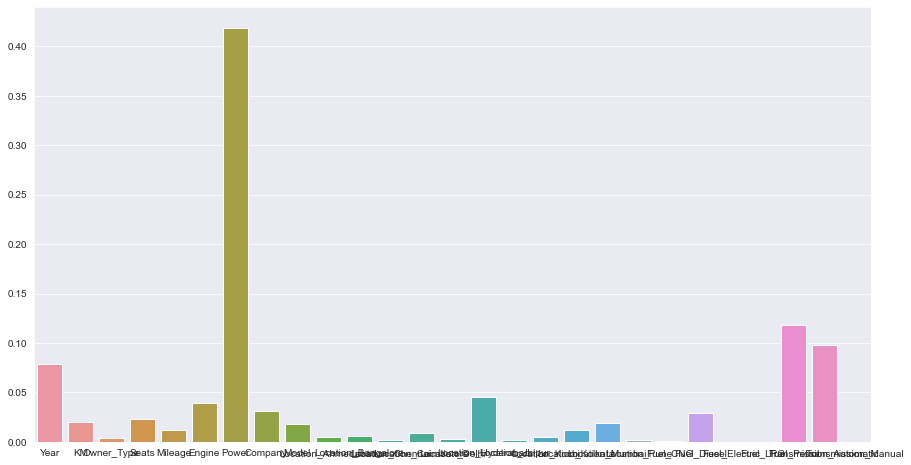



****************************************************************************************************




In [156]:
xgb_fi = feature_importance(xgb , X_train , y_train)

In [157]:
pd.DataFrame(xgb_fi , columns = ["Feature Importances" , "Feartures"]).sort_values(by = ["Feature Importances"] , ascending = False).reset_index(drop = True)

Feature Importances               Feartures
0              0.418948                   Power
1              0.118469             Fuel_Petrol
2              0.097906  Transmission_Automatic
3              0.078451                    Year
4              0.045775      Location_Hyderabad
5              0.039715                  Engine
6              0.031087                 Company
7              0.028856             Fuel_Diesel
8              0.023193                   Seats
9              0.019836                      KM
10             0.018609         Location_Mumbai
11             0.017840                   Model
12             0.012389        Location_Kolkata
13             0.011842                 Mileage
14             0.008851     Location_Coimbatore
15             0.006221      Location_Bangalore
16             0.005182      Location_Ahmedabad
17             0.004715          Location_Kochi
18             0.003729              Owner_Type
19             0.003256          Location_Delhi
20             0.001649        Location_Chennai
21             0.001541         Location_Jaipur
22             0.001479           Location_Pune
23             0.000383                Fuel_CNG
24             0.000076                Fuel_LPG
25             0.000000           Fuel_Electric
26             0.000000     Transmission_Manual

In [158]:
X.head().T

0          1           2          3  \
Year                     11.000000   6.000000   10.000000   9.000000   
KM                       11.184435  10.621352   10.736418  11.373675   
Owner_Type                1.000000   1.000000    1.000000   1.000000   
Seats                     1.791759   1.791759    1.791759   2.079442   
Mileage                   3.643882   3.028683    2.954910   3.080533   
Engine                    6.906755   7.367077    7.090077   7.130099   
Power                     4.080246   4.845761    4.496471   4.497139   
Company                  19.000000  11.000000   10.000000  19.000000   
Model                   196.000000  56.000000  103.000000  72.000000   
Location_Ahmedabad        0.000000   0.000000    0.000000   0.000000   
Location_Bangalore        0.000000   0.000000    0.000000   0.000000   
Location_Chennai          0.000000   0.000000    1.000000   1.000000   
Location_Coimbatore       0.000000   0.000000    0.000000   0.000000   
Location_Delhi            0.000000   0.000000    0.000000   0.000000   
Location_Hyderabad        0.000000   0.000000    0.000000   0.000000   
Location_Jaipur           0.000000   0.000000    0.000000   0.000000   
Location_Kochi            0.000000   0.000000    0.000000   0.000000   
Location_Kolkata          0.000000   0.000000    0.000000   0.000000   
Location_Mumbai           1.000000   0.000000    0.000000   0.000000   
Location_Pune             0.000000   1.000000    0.000000   0.000000   
Fuel_CNG                  1.000000   0.000000    0.000000   0.000000   
Fuel_Diesel               0.000000   1.000000    0.000000   1.000000   
Fuel_Electric             0.000000   0.000000    0.000000   0.000000   
Fuel_LPG                  0.000000   0.000000    0.000000   0.000000   
Fuel_Petrol               0.000000   0.000000    1.000000   0.000000   
Transmission_Automatic    0.000000   0.000000    0.000000   0.000000   
Transmission_Manual       1.000000   1.000000    1.000000   1.000000   

                                4  
Year                     8.000000  
KM                      10.613271  
Owner_Type               2.000000  
Seats                    1.791759  
Mileage                  2.785011  
Engine                   7.585281  
Power                    4.954418  
Company                  1.000000  
Model                   12.000000  
Location_Ahmedabad       0.000000  
Location_Bangalore       0.000000  
Location_Chennai         0.000000  
Location_Coimbatore      1.000000  
Location_Delhi           0.000000  
Location_Hyderabad       0.000000  
Location_Jaipur          0.000000  
Location_Kochi           0.000000  
Location_Kolkata         0.000000  
Location_Mumbai          0.000000  
Location_Pune            0.000000  
Fuel_CNG                 0.000000  
Fuel_Diesel              1.000000  
Fuel_Electric            0.000000  
Fuel_LPG                 0.000000  
Fuel_Petrol              0.000000  
Transmission_Automatic   1.000000  
Transmission_Manual      0.000000

In [159]:
tt.head().T

0          1           2          3  \
Year                    -0.185622   0.121621   -1.107349   0.428863   
KM                      -0.193887   0.212684   -0.457342   1.542778   
Owner_Type               1.000000   2.000000    1.000000   1.000000   
Seats                   -1.823055  -0.310580    2.075929  -0.310580   
Mileage                  2.487909   0.902161   -0.613995   0.782626   
Engine                  -1.253250  -1.919452    1.324163  -0.332674   
Power                   -1.388053  -1.888086    0.876783  -0.131978   
Company                 19.000000  19.000000   30.000000  30.000000   
Model                   19.000000  19.000000  102.000000  75.000000   
Location_Ahmedabad       0.000000   0.000000    0.000000   0.000000   
Location_Bangalore       0.000000   0.000000    0.000000   0.000000   
Location_Chennai         0.000000   0.000000    0.000000   0.000000   
Location_Coimbatore      0.000000   1.000000    0.000000   0.000000   
Location_Delhi           1.000000   0.000000    0.000000   0.000000   
Location_Hyderabad       0.000000   0.000000    0.000000   1.000000   
Location_Jaipur          0.000000   0.000000    0.000000   0.000000   
Location_Kochi           0.000000   0.000000    0.000000   0.000000   
Location_Kolkata         0.000000   0.000000    0.000000   0.000000   
Location_Mumbai          0.000000   0.000000    1.000000   0.000000   
Location_Pune            0.000000   0.000000    0.000000   0.000000   
Fuel_CNG                 1.000000   0.000000    0.000000   0.000000   
Fuel_Diesel              0.000000   0.000000    1.000000   1.000000   
Fuel_Electric            0.000000   0.000000    0.000000   0.000000   
Fuel_LPG                 0.000000   0.000000    0.000000   0.000000   
Fuel_Petrol              0.000000   1.000000    0.000000   0.000000   
Transmission_Automatic   0.000000   0.000000    0.000000   0.000000   
Transmission_Manual      1.000000   1.000000    1.000000   1.000000   

                                 4  
Year                     -0.185622  
KM                       -0.683278  
Owner_Type                1.000000  
Seats                    -0.310580  
Mileage                   0.154712  
Engine                   -0.717534  
Power                    -0.532652  
Company                  11.000000  
Model                   217.000000  
Location_Ahmedabad        0.000000  
Location_Bangalore        0.000000  
Location_Chennai          0.000000  
Location_Coimbatore       0.000000  
Location_Delhi            0.000000  
Location_Hyderabad        0.000000  
Location_Jaipur           0.000000  
Location_Kochi            0.000000  
Location_Kolkata          0.000000  
Location_Mumbai           1.000000  
Location_Pune             0.000000  
Fuel_CNG                  0.000000  
Fuel_Diesel               0.000000  
Fuel_Electric             0.000000  
Fuel_LPG                  0.000000  
Fuel_Petrol               1.000000  
Transmission_Automatic    0.000000  
Transmission_Manual       1.000000

## Droping useless columns and building final model

In [160]:
X.drop(["Fuel_Electric" , "Transmission_Manual"] , axis = 1 , inplace = True)
tt.drop(["Fuel_Electric" , "Transmission_Manual"] , axis = 1 , inplace = True)

In [161]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(4815, 1204, 4815, 1204)

In [162]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[ints] = scaler.fit_transform(X_train[ints])
X_test[ints] = scaler.transform(X_test[ints])
tt[ints] = scaler.transform(tt[ints])

In [163]:
X_train.head().T

4248       4129        2534        2893  \
Year                     0.736105  -0.185622   -1.414591    0.736105   
KM                       0.688098   0.455171   -3.953539    1.650961   
Owner_Type               1.000000   1.000000    1.000000    1.000000   
Seats                   -0.310580  -0.310580   -0.310580    3.053015   
Mileage                  0.168561   0.690803    0.859691   -0.744338   
Engine                  -0.712615  -0.056509   -0.594587    1.446029   
Power                   -0.635895  -0.109919   -0.372414   -0.060818   
Company                  4.000000   8.000000   19.000000   30.000000   
Model                   29.000000  65.000000  193.000000  102.000000   
Location_Ahmedabad       0.000000   0.000000    0.000000    0.000000   
Location_Bangalore       0.000000   0.000000    0.000000    0.000000   
Location_Chennai         0.000000   0.000000    0.000000    0.000000   
Location_Coimbatore      0.000000   1.000000    0.000000    0.000000   
Location_Delhi           1.000000   0.000000    0.000000    1.000000   
Location_Hyderabad       0.000000   0.000000    0.000000    0.000000   
Location_Jaipur          0.000000   0.000000    0.000000    0.000000   
Location_Kochi           0.000000   0.000000    0.000000    0.000000   
Location_Kolkata         0.000000   0.000000    1.000000    0.000000   
Location_Mumbai          0.000000   0.000000    0.000000    0.000000   
Location_Pune            0.000000   0.000000    0.000000    0.000000   
Fuel_CNG                 0.000000   0.000000    0.000000    0.000000   
Fuel_Diesel              0.000000   1.000000    1.000000    1.000000   
Fuel_LPG                 0.000000   0.000000    0.000000    0.000000   
Fuel_Petrol              1.000000   0.000000    0.000000    0.000000   
Transmission_Automatic   0.000000   0.000000    0.000000    0.000000   

                             2860  
Year                    -1.107349  
KM                       1.053555  
Owner_Type               1.000000  
Seats                   -0.310580  
Mileage                  0.711228  
Engine                  -0.594587  
Power                   -0.806741  
Company                 29.000000  
Model                   32.000000  
Location_Ahmedabad       0.000000  
Location_Bangalore       0.000000  
Location_Chennai         0.000000  
Location_Coimbatore      0.000000  
Location_Delhi           0.000000  
Location_Hyderabad       1.000000  
Location_Jaipur          0.000000  
Location_Kochi           0.000000  
Location_Kolkata         0.000000  
Location_Mumbai          0.000000  
Location_Pune            0.000000  
Fuel_CNG                 0.000000  
Fuel_Diesel              1.000000  
Fuel_LPG                 0.000000  
Fuel_Petrol              0.000000  
Transmission_Automatic   0.000000

In [164]:
X_test.head().T

2868        5924        3764        4144  \
Year                      0.121621   -1.107349   -0.185622   -0.800106   
KM                        0.547953   -0.798469    0.860789    0.146168   
Owner_Type                1.000000    1.000000    1.000000    2.000000   
Seats                    -0.310580    2.075929    2.075929   -0.310580   
Mileage                   0.761626   -0.314028   -0.364012    0.933582   
Engine                   -0.594587    0.790910    1.048007   -0.264336   
Power                    -0.806741    0.368585    0.744474   -0.975925   
Company                  19.000000   18.000000   18.000000   29.000000   
Model                   176.000000  168.000000  208.000000  101.000000   
Location_Ahmedabad        0.000000    0.000000    0.000000    0.000000   
Location_Bangalore        0.000000    0.000000    0.000000    0.000000   
Location_Chennai          0.000000    0.000000    0.000000    0.000000   
Location_Coimbatore       0.000000    0.000000    0.000000    0.000000   
Location_Delhi            0.000000    0.000000    1.000000    0.000000   
Location_Hyderabad        1.000000    0.000000    0.000000    0.000000   
Location_Jaipur           0.000000    0.000000    0.000000    0.000000   
Location_Kochi            0.000000    1.000000    0.000000    0.000000   
Location_Kolkata          0.000000    0.000000    0.000000    0.000000   
Location_Mumbai           0.000000    0.000000    0.000000    0.000000   
Location_Pune             0.000000    0.000000    0.000000    1.000000   
Fuel_CNG                  0.000000    0.000000    0.000000    0.000000   
Fuel_Diesel               1.000000    1.000000    1.000000    1.000000   
Fuel_LPG                  0.000000    0.000000    0.000000    0.000000   
Fuel_Petrol               0.000000    0.000000    0.000000    0.000000   
Transmission_Automatic    0.000000    0.000000    0.000000    0.000000   

                              2780  
Year                      1.350590  
KM                        1.075023  
Owner_Type                1.000000  
Seats                    -0.310580  
Mileage                  -7.887381  
Engine                   -0.066363  
Power                    -0.131978  
Company                  11.000000  
Model                   166.000000  
Location_Ahmedabad        0.000000  
Location_Bangalore        0.000000  
Location_Chennai          0.000000  
Location_Coimbatore       0.000000  
Location_Delhi            0.000000  
Location_Hyderabad        0.000000  
Location_Jaipur           0.000000  
Location_Kochi            0.000000  
Location_Kolkata          0.000000  
Location_Mumbai           0.000000  
Location_Pune             1.000000  
Fuel_CNG                  0.000000  
Fuel_Diesel               0.000000  
Fuel_LPG                  0.000000  
Fuel_Petrol               1.000000  
Transmission_Automatic    0.000000

In [165]:
tt.head().T

0          1           2          3  \
Year                    -2.393349  -2.298951   -2.676542  -2.204553   
KM                     -15.553908 -14.976395  -15.928132 -13.087066   
Owner_Type               1.000000   2.000000    1.000000   1.000000   
Seats                  -30.297802 -17.750843    2.046790 -17.750843   
Mileage                 -1.151623  -5.444873   -9.549710  -5.768501   
Engine                 -25.317920 -27.282616  -17.716870 -22.603049   
Power                  -14.826885 -16.055609   -9.261538 -11.740351   
Company                 19.000000  19.000000   30.000000  30.000000   
Model                   19.000000  19.000000  102.000000  75.000000   
Location_Ahmedabad       0.000000   0.000000    0.000000   0.000000   
Location_Bangalore       0.000000   0.000000    0.000000   0.000000   
Location_Chennai         0.000000   0.000000    0.000000   0.000000   
Location_Coimbatore      0.000000   1.000000    0.000000   0.000000   
Location_Delhi           1.000000   0.000000    0.000000   0.000000   
Location_Hyderabad       0.000000   0.000000    0.000000   1.000000   
Location_Jaipur          0.000000   0.000000    0.000000   0.000000   
Location_Kochi           0.000000   0.000000    0.000000   0.000000   
Location_Kolkata         0.000000   0.000000    0.000000   0.000000   
Location_Mumbai          0.000000   0.000000    1.000000   0.000000   
Location_Pune            0.000000   0.000000    0.000000   0.000000   
Fuel_CNG                 1.000000   0.000000    0.000000   0.000000   
Fuel_Diesel              0.000000   0.000000    1.000000   1.000000   
Fuel_LPG                 0.000000   0.000000    0.000000   0.000000   
Fuel_Petrol              0.000000   1.000000    0.000000   0.000000   
Transmission_Automatic   0.000000   0.000000    0.000000   0.000000   

                                 4  
Year                     -2.393349  
KM                      -16.249062  
Owner_Type                1.000000  
Seats                   -17.750843  
Mileage                  -7.468514  
Engine                  -23.738040  
Power                   -12.724921  
Company                  11.000000  
Model                   217.000000  
Location_Ahmedabad        0.000000  
Location_Bangalore        0.000000  
Location_Chennai          0.000000  
Location_Coimbatore       0.000000  
Location_Delhi            0.000000  
Location_Hyderabad        0.000000  
Location_Jaipur           0.000000  
Location_Kochi            0.000000  
Location_Kolkata          0.000000  
Location_Mumbai           1.000000  
Location_Pune             0.000000  
Fuel_CNG                  0.000000  
Fuel_Diesel               0.000000  
Fuel_LPG                  0.000000  
Fuel_Petrol               1.000000  
Transmission_Automatic    0.000000



XGBRegressor


Training score : 0.9967


Test Score : 0.9012


K-fold accuracy : 0.9087


Standard Deviation of Accuracies in k-fold : 0.0424


Mean Absolute Error : 1.3778


Root Mean Squared Error : 3.4869


Mean Squared Log Error : 0.0396


R2_score : 90.1196




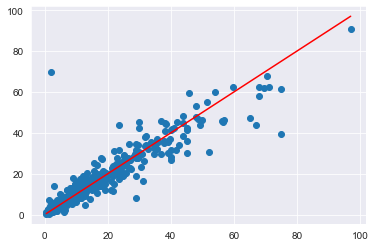



****************************************************************************************************





AdaBoostRegressor


Training score : 0.5630


Test Score : 0.4806


K-fold accuracy : 0.4930


Standard Deviation of Accuracies in k-fold : 0.1227


Mean Absolute Error : 7.0528


Root Mean Squared Error : 7.9949


Mean Squared Log Error : 0.7259


R2_score : 48.0583




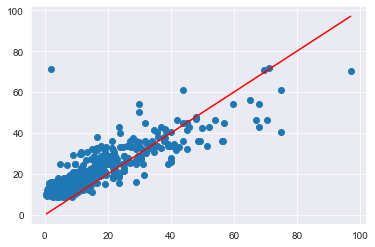



****************************************************************************************************





RandomForest Regressor


Training score : 0.9856


Test Score : 0.8704


K-fold accuracy : 0.9025


Standard Deviation of Accuracies in k-fold : 0.0449


Mean Absolute Error : 1.5883


Root Mean Squared Error : 3.9943


Mean Squared Log Error : 0.0469


R2_score : 87.0354




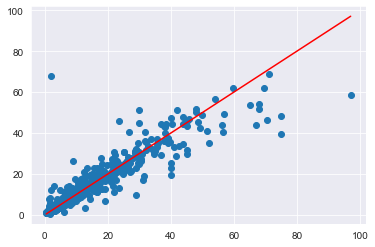



****************************************************************************************************





KNeigbors Regressor


Training score : 0.8917


Test Score : 0.8802


K-fold accuracy : 0.8410


Standard Deviation of Accuracies in k-fold : 0.0542


Mean Absolute Error : 1.7532


Root Mean Squared Error : 3.8402


Mean Squared Log Error : 0.0548


R2_score : 88.0165




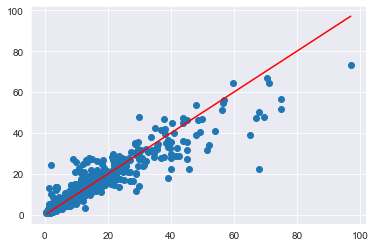



****************************************************************************************************



Wall time: 32.4 s


In [166]:
%%time

final = []
for i in models:
    sam = metrics(i , X_train , y_train , X_test , y_test)
    final.append(sam)

In [167]:
final

[(['XGBRegressor',
   0.996682074459879,
   0.9011962859204917,
   0.9087009018857023,
   0.04235406339531109,
   1.3778262042642828,
   3.4869377470480463,
   0.03964413087402634,
   90.11962859204917],
  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None)),
 (['AdaBoostRegressor',
   0.5630031887585656,
   0.4805829287658744,
   0.49296090016654465,
   0.1227496017368156,
   7.052813032224163,
   7.99494845929243,
   0.7259329378119701,
   48.05829287658744

In [168]:
data_final = [x[0] for x in final]
data_final

[['XGBRegressor',
  0.996682074459879,
  0.9011962859204917,
  0.9087009018857023,
  0.04235406339531109,
  1.3778262042642828,
  3.4869377470480463,
  0.03964413087402634,
  90.11962859204917],
 ['AdaBoostRegressor',
  0.5630031887585656,
  0.4805829287658744,
  0.49296090016654465,
  0.1227496017368156,
  7.052813032224163,
  7.99494845929243,
  0.7259329378119701,
  48.05829287658744],
 ['RandomForest Regressor',
  0.9855855270298468,
  0.8703541367266977,
  0.9025194058040892,
  0.044889739680947935,
  1.5882537741259295,
  3.9942651464909114,
  0.04692969762461202,
  87.03541367266978],
 ['KNeigbors Regressor',
  0.8916999788952769,
  0.8801646149532381,
  0.8410082141154259,
  0.05424302297239038,
  1.7531926910299003,
  3.8401668706821046,
  0.054820481243666425,
  88.01646149532381]]

In [169]:
# Before removing useless columns
me

Model  Train Score  Test Score  K-fold Accuracy  \
0            XGBRegressor     0.996682    0.901196         0.908701   
1     KNeigbors Regressor     0.891888    0.880262         0.841466   
2  RandomForest Regressor     0.985708    0.868899         0.902881   
3       AdaBoostRegressor     0.418550    0.331774         0.498891   

   K-fold Std       MAE      RMSE      MLSE   R2_Score  
0    0.042354  1.377826  3.486938  0.039644  90.119629  
1    0.054528  1.758213  3.838608  0.054887  88.026187  
2    0.044710  1.593109  4.016624  0.047084  86.889864  
3    0.106493  8.239339  9.068158  0.871320  33.177447

In [170]:
# After Removing useless columns

mef = pd.DataFrame(data_final , columns = ["Model" , "Train Score" , "Test Score" , "K-fold Accuracy" , "K-fold Std" , "MAE" , "RMSE" , "MLSE" , "R2_Score"])

mef.sort_values(by = ["R2_Score" , "MLSE" , "RMSE" , "K-fold Accuracy" , "MAE" , "Train Score" , "Test Score"] , inplace = True , ascending = (False , True , True , False , True , False , False))
mef = mef.reset_index(drop = True)
mef

Model  Train Score  Test Score  K-fold Accuracy  \
0            XGBRegressor     0.996682    0.901196         0.908701   
1     KNeigbors Regressor     0.891700    0.880165         0.841008   
2  RandomForest Regressor     0.985586    0.870354         0.902519   
3       AdaBoostRegressor     0.563003    0.480583         0.492961   

   K-fold Std       MAE      RMSE      MLSE   R2_Score  
0    0.042354  1.377826  3.486938  0.039644  90.119629  
1    0.054243  1.753193  3.840167  0.054820  88.016461  
2    0.044890  1.588254  3.994265  0.046930  87.035414  
3    0.122750  7.052813  7.994948  0.725933  48.058293

## Final Model Fitting

In [171]:
xgb = XGBRegressor(random_state = 42 , objective ='reg:squarederror' , n_estimators = 100)
xgb.fit(X_train , y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [172]:
preds = xgb.predict(X_test)
preds

array([ 5.079159 , 11.656684 ,  8.170097 , ...,  6.235051 ,  5.55011  ,
        2.3987768], dtype=float32)

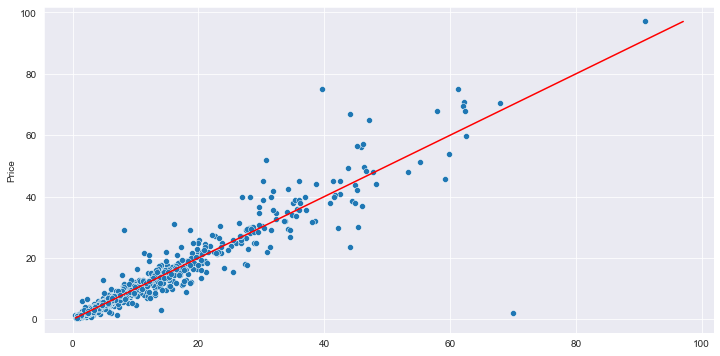

In [173]:
plt.figure(figsize = (12 , 6))
sns.scatterplot(x = preds , y = y_test)
x = np.linspace(min(y_test) , max(y_test) , 100)
y = x
plt.plot(x, y , "-r")

<AxesSubplot:xlabel='Price', ylabel='Density'>

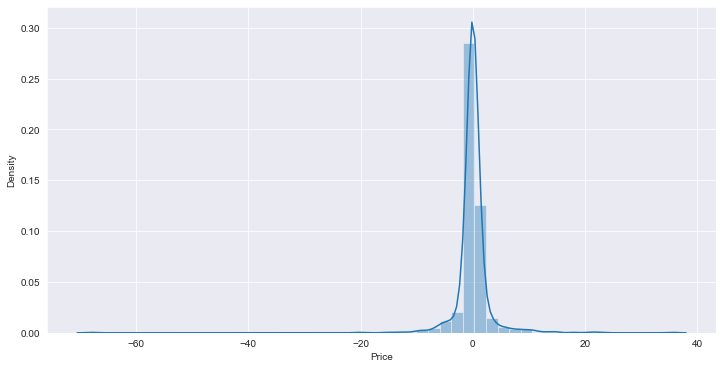

In [174]:
plt.figure(figsize = (12 , 6))
sns.distplot(y_test - preds)

In [176]:
test_preds = xgb.predict(tt)
test_preds

array([13.060475 , 11.404341 , 14.152337 , ..., 12.484707 ,  7.9804363,
       15.249508 ], dtype=float32)

In [177]:
final = pd.DataFrame(test_preds , columns = ["Price"])
final

Price
0     13.060475
1     11.404341
2     14.152337
3     14.553644
4      8.831954
...         ...
1229  14.188853
1230   8.947195
1231  12.484707
1232   7.980436
1233  15.249508

[1234 rows x 1 columns]

## Saving Models , Scalers , Encoders

In [178]:
import pickle
pickle.dump(xgb, open("Cars Xgb 1.pkl", 'wb'))

In [179]:
pickle.dump(scaler, open("Feature Scaler 1.pkl", 'wb'))
pickle.dump(lb1, open("Company Label 1.pkl", 'wb'))
pickle.dump(lb2, open("Model Label 1.pkl", 'wb'))

In [180]:
final.to_csv("Kaggle Car Rate 1.csv" , index = False)